## Import & data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
from sklearn.model_selection import TimeSeriesSplit

df = pd.read_excel("E:\\SNC\\API Fatigue\\Fatigue Petrosea Kideco\\Fatigue.xlsx")

# Karena yang dapat dipakai hanya data yang sudah diproses maka data harus di filter terlebih dahulu
df = df[df['Processing state'] == 'Processed']
display(df.head())


,Risk Level,License plate number,Plate color,Driver,Organization,Alarm type,Alarm time,Processing time,In examination range,Processing duration,Severity,Process person,Processing method,Processing state,Speed,Address,Process description
0,High Risk,DT637,Unknown,-,Petrosea_Kideco,Warning-level2,2025-06-09 23:46:51,2025-06-10 01:27:28,YES,1小时40分36秒,Level one,adminpetroseaKJA,alarm-resolved.1,Processed,11.0,Kalimantan TimurPasir,NaN
1,High Risk,DT862,Unknown,-,Petrosea_Kideco,Warning-level2,2025-06-09 23:46:58,2025-06-10 01:27:49,YES,1小时40分50秒,Level one,adminpetroseaKJA,alarm-resolved.1,Processed,9.0,Kalimantan TimurPasir,NaN
2,High Risk,DT862,Unknown,-,Petrosea_Kideco,Warning-level2,2025-06-09 23:47:01,2025-06-10 01:27:25,YES,1小时40分24秒,Level one,adminpetroseaKJA,alarm-resolved.1,Processed,10.0,Kalimantan TimurPasir,NaN
3,High Risk,DT862,Unknown,-,Petrosea_Kideco,Warning-level2,2025-06-09 23:48:02,2025-06-10 01:27:21,YES,1小时39分18秒,Level one,adminpetroseaKJA,alarm-resolved.1,Processed,11.0,Kalimantan TimurPasir,NaN
4,High Risk,DT848,Other,-,Petrosea_Kideco,Warning-level2,2025-06-09 23:51:23,2025-06-10 01:27:07,YES,1小时35分44秒,Level one,adminpetroseaKJA,alarm-resolved.1,Processed,6.0,Kalimantan TimurPasir,NaN


## Introduction

Data yang digunakan merupakan data dari perusahaan software development yang terfokus pada penyedia software kepada perusahaan tambang di Indonesia untuk berbagai kebutuhan diantaranya sensor pada unit tambang, ERP internal perusahaan, dll.

Pada kali ini data yang digunakan merupakan data dari unit yang beroperasi didaerah tambang yakni Dump truck yang memuat hasil galian dari titik a dan dipindahkan ke titik b.

Alat yang terpasang dalam unit ini memiliki berbagai fungsi diantaranya membaca sensor mesin, speed, behavior operator, dll.
Alat ini dapat membaca behavior operator seperti merokok, kelelahan, penggunaan alat komunikasi, muka yang tertutup, dsb.pembacaan behavior operator ini bertujuan untuk memudahkan opresional tambang dalam memantau operator dan dapat memitigasi resiko seperti kelalahan maupun pelanggaran merokok dan penggunaan alat komunikasi yang dapat menimbulkan menurunnya fokus dan menyebabkan kecelakaan kerja, alat ini bekerja dengan menangkap citra pada kamera yang terpasang pada unit dan mendeteksi behavior tertentu yang sedang dilakukan oleh operator dan jika kamera menangkap behavior tertentu yang dianggap membahayakan, sinyal peringatan akan dikirm pada pengawas lapangan beserta hasil tangkapan kamera untuk ditindaklanjuti.

## Data understanding

dataset yang digunakan merupakan data kelelahan yang terjadi pada opersional tambang, dengan tujuan agar dapat memprediksi kelelahan yang akan terjadi dan dapat menekan resiko yang terjadi akibat kelelahan. dataset ini berisikan data kelelahan pada bulan Juni - September 2025 (data hanya berisikan yang mengalami kelelahan), data ini berisi kolom diantaranya:
1. Risk Level = Klasidikasi risk level berdasarkan resiko yang terjadi akibat behavior tertentu.
2. License plate number = Nomor lambung unit dimana alat dipasangkan.
3. Plate color = Warna plat atau unit (tidak dipakai oleh pengguna layanan)
4. Driver = Nama operator yang mengoperasikan unit (tidak dipakai oleh pengguna layanan)
5. Organization = Nama pengguna layanan.
6. Alarm type = Tipe alarm yang diberikan kepada pengawas lapangan.
7. Alarm time = Waktu dikirimkannya alarm kepada pengawas.
8. Processing time = Waktu saat proses dilakukan oleh pengawas lapangan.
9. In examination range = Operator sedang dalam proses pemeriksaan (Tidak dipakai oleh pengguna jasa lauyanan)
10. Processing duration = Durasi Proses dalam menanggapi alarm.
11. Severity  = Tingkat kerusakan yang terjadi akibat kejadian yang terjadi (Tidak dipakai oleh pengguna layanan)
12. Process person = Nama yang memproses kejadian (tidak dipakai oleh pengguna layanan)
13. Processing method = Metode penyelesaian yang dilakukan pengguna layanan (tidak dipakai oleh pengguna layanan)
14. Processing state = Status proses
15. Speed = kecepatan unit saat terjadi behavior yang tertangkap.
16. Address = Tempat berlangsungnya kejadian.
17. Process description = keterangan yang diberikan oleh pengawas lapangan.


## Tujuan

dengan data ini diharapkan dapat diolah menjadi model yang bertujuan memprediksi kelelahan yang terjadi saat operasional di masa mendatang untuk menekan resiko yang ada, selian itu dengan fitur prediksi yang dimiliki oleh perusahaan penyedia jasa diharapkan dapat menjadi nilai tambah agar pengguna jasa terus berlangganan dan sebagai alat jual penyedia jasa untuk para pengguna jasa yang membutuhkan.

oleh karena itu, prediksi yang dibuat harus dilakukan dengan teliti dengan hasil sebaik mungkin agar fitur ini menjadi daya tarik perusahaan penyedia jasa itu sendiri walaupun dengan data yang terbatas.

## EDA


In [2]:
# profile = ProfileReport(df, title="Fatigue Petrosea Kideco")
# profile.to_notebook_iframe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22916 entries, 0 to 23084
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Risk Level            22916 non-null  object 
 1   License plate number  22916 non-null  object 
 2   Plate color           22916 non-null  object 
 3   Driver                22916 non-null  object 
 4   Organization          22916 non-null  object 
 5   Alarm type            22916 non-null  object 
 6   Alarm time            22916 non-null  object 
 7   Processing time       22916 non-null  object 
 8   In examination range  22916 non-null  object 
 9   Processing duration   22916 non-null  object 
 10  Severity              22916 non-null  object 
 11  Process person        22916 non-null  object 
 12  Processing method     22916 non-null  object 
 13  Processing state      22916 non-null  object 
 14  Speed                 22916 non-null  float64
 15  Address               22

1. Risk Level 
Tidak ada missing value dengan berisikan 1 unique value
2. License plate number
Tidak ada missing value dengan berisikan 105 unique values
3. Plate color
Tidak ada missing value dengan berisikan 3 unique values
4. Driver
Tidak ada missing value dengan berisikan 2 unique value
5. Organization
Tidak ada missing value dengan berisikan 1 unique value
6. Alarm type
Tidak ada missing value dengan berisikan 1 unique value
7. Alarm time
Tidak ada missing value
8. Processing time
Tidak ada missing value
9. In examination range = berisikan 2 unique values tanpa missing value
10. Processing duration
Tidak ada missing value
11. Severity
Tidak ada missing value dengan berisikan 1 unique value
12. Process person
Tidak ada missing value dengan berisikan 2 unique values
13. Processing method
Tidak ada missing value dengan berisikan 5 unique value
14. Processing state
Tidak ada missing value
15. Speed
Tidak ada missing value
16. Address
Ada 8 missing Values dengan 1 unique value pada kolom yang terisi
17. Process description = keterangan yang diberikan oleh pengawas lapangan.
Terdapat 99.9% missing values.

kolom yang tidak dipakai oleh pengguna layanan akan didrop dan kolom dengan bahasa sangsakerta akan diubah menjadi bahasa yang mudah dimengerti, untuk pembuatan model prediksi akan dibuat kolom yang dibutuhkan dengan grouping berdasarkan satuan minggu.

## Persiapan data
Data yang diolah akna menghasilkan data dimana digrouping berdasarkan waktu mingguan dan akan menambahkan data yang bisa dikembangkan dari data yang ada.

In [4]:
# Mengubah kolom Alarm Time menjadi datetime
df["Alarm time"] = pd.to_datetime(df["Alarm time"], errors="coerce")
# Mengambil waktu berdasarkan calendar
iso = df["Alarm time"].dt.isocalendar()
# Mengambil data Tahun dan minggu
df["iso_year"] = iso["year"]
df["iso_week"] = iso["week"]
# Grouping data berdasarkan minggu dan tahun
weekly = ( df.groupby(["License plate number", "iso_year", "iso_week"]) .size() .reset_index(name="fatigue_count") )
# Menambahkan fitur week_start untuk mengecek penambilan data berdasarkan kalender sudah benar
weekly["week_start"] = weekly.apply( lambda r: pd.Timestamp.fromisocalendar(r["iso_year"], r["iso_week"], 1).date(), axis=1 )
latest_week = weekly['iso_week'].max()
pair_set = set(zip(weekly['License plate number'], weekly['iso_week']))
weekly["next_week_fatigue"] = weekly.apply(
    lambda row:
        np.nan
        if row["iso_week"] == latest_week
        else (
            (row["License plate number"], row["iso_week"] + 1) in pair_set
        ),
    axis=1
)
# Merubah keteranan waktu berbahasa sangsakerta menjadi bahasa inggris dan mengubahnya menjadi kolom berbasis waktu
import re
def to_timedelta(text):
    hours = 0
    minutes = 0
    seconds = 0

    h = re.search(r'(\d+)小时', text)
    if h:
        hours = int(h.group(1))

    m = re.search(r'(\d+)分', text)
    if m:
        minutes = int(m.group(1))

    s = re.search(r'(\d+)秒', text)
    if s:
        seconds = int(s.group(1))

    return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)
# Menambahkan fitur hasil pengembangan fitur yang ada
df['Processing duration'] = df['Processing duration'].apply(to_timedelta)
df["Processing duration"] = (df["Processing duration"].dt.total_seconds() / 60).astype(int)

# Buat kolom gabungan ISO YEAR-WEEK
weekly["iso_year_week"] = (
    weekly["iso_year"].astype(str) + "-" +
    weekly["iso_week"].astype(str).str.zfill(2)
)

# Sortir berdasarkan waktu yang sudah digabung
weekly = weekly.sort_values("iso_year_week").reset_index(drop=True)

# Drop kolom iso_year dan iso_week
weekly = weekly.drop(columns=["iso_year", "iso_week"])





weekly.head(15)

,License plate number,fatigue_count,week_start,next_week_fatigue,iso_year_week
0,DT696,14,2025-06-09,False,2025-24
1,DT800,6,2025-06-09,False,2025-24
2,DT841,22,2025-06-09,False,2025-24
3,DT588,29,2025-06-09,False,2025-24
4,DT734,42,2025-06-09,False,2025-24
5,DT857,10,2025-06-09,False,2025-24
6,DT859,23,2025-06-09,False,2025-24
7,DT746,15,2025-06-09,False,2025-24
8,DT593,3,2025-06-09,False,2025-24
9,DT729,63,2025-06-09,False,2025-24


In [5]:
import re

# =========================================================
# 1. DATETIME → ISO WEEK
# =========================================================
df["Alarm time"] = pd.to_datetime(df["Alarm time"], errors="coerce")

iso = df["Alarm time"].dt.isocalendar()
df["iso_year"] = iso["year"].astype(int)
df["iso_week"] = iso["week"].astype(int)

# =========================================================
# 2. WEEKLY AGGREGATION
# =========================================================
weekly = (
    df.groupby(["License plate number", "iso_year", "iso_week"])
      .size()
      .reset_index(name="fatigue_count")
)

# =========================================================
# 3. ISO YEAR-WEEK
# =========================================================
weekly["iso_year_week"] = (
    weekly["iso_year"].astype(str) + "-" +
    weekly["iso_week"].astype(str).str.zfill(2)
)

weekly = weekly.sort_values(
    ["License plate number", "iso_year", "iso_week"]
).reset_index(drop=True)

# =========================================================
# 4. TARGET: NEXT WEEK FATIGUE
# =========================================================
pair_set = set(
    zip(
        weekly["License plate number"],
        weekly["iso_year_week"]
    )
)

def next_week_key(year, week):
    d = pd.Timestamp.fromisocalendar(year, week, 1) + pd.Timedelta(weeks=1)
    return f"{d.isocalendar().year}-{str(d.isocalendar().week).zfill(2)}"

weekly["next_week_fatigue"] = weekly.apply(
    lambda r: int(
        (r["License plate number"],
         next_week_key(r["iso_year"], r["iso_week"])
        ) in pair_set
    ),
    axis=1
)

# =========================================================
# 5. PROCESSING DURATION → MINUTES
# =========================================================
def to_minutes(text):
    if pd.isna(text):
        return 0

    h = re.search(r"(\d+)小时", str(text))
    m = re.search(r"(\d+)分", str(text))
    s = re.search(r"(\d+)秒", str(text))

    seconds = (
        (int(h.group(1)) if h else 0) * 3600 +
        (int(m.group(1)) if m else 0) * 60 +
        (int(s.group(1)) if s else 0)
    )
    return seconds // 60

df["Processing duration"] = df["Processing duration"].apply(to_minutes)

# =========================================================
# 6. STATIC FEATURES
# =========================================================
static_features = (
    df.groupby("License plate number")
      .agg(
          avg_duration=("Processing duration", "mean"),
          avg_speed=("Speed", "mean")
      )
      .reset_index()
)

weekly = weekly.merge(
    static_features,
    on="License plate number",
    how="left"
)

# =========================================================
# 7. FULL (PLATE × WEEK) GRID
# =========================================================
all_plates = weekly["License plate number"].unique()
all_weeks = weekly["iso_year_week"].unique()

full_index = pd.MultiIndex.from_product(
    [all_plates, all_weeks],
    names=["License plate number", "iso_year_week"]
)

weekly = (
    weekly
    .set_index(["License plate number", "iso_year_week"])
    .reindex(full_index)
    .reset_index()
)

# =========================================================
# 8. FILL MISSING VALUES
# =========================================================
weekly["fatigue_count"] = weekly["fatigue_count"].fillna(0).astype(int)
weekly["next_week_fatigue"] = weekly["next_week_fatigue"].fillna(0).astype(int)

weekly[["avg_duration", "avg_speed"]] = (
    weekly
    .groupby("License plate number")[["avg_duration", "avg_speed"]]
    .transform(lambda x: x.ffill().bfill())
)

# =========================================================
# 9. SORT FINAL
# =========================================================
weekly = weekly.sort_values(
    ["License plate number", "iso_year_week"]
).reset_index(drop=True)

# =========================================================
# 10. GAP FEATURE (CORRECT VERSION)
# =========================================================
weekly["gap"] = 0

for plate, idxs in weekly.groupby("License plate number").groups.items():
    idxs = list(idxs)
    last_fatigue_pos = None

    for pos, row_idx in enumerate(idxs):
        if weekly.loc[row_idx, "fatigue_count"] > 0:
            weekly.loc[row_idx, "gap"] = 0
            last_fatigue_pos = pos
        else:
            if last_fatigue_pos is None:
                # sebelum fatigue pertama → naik bertahap
                weekly.loc[row_idx, "gap"] = pos
            else:
                weekly.loc[row_idx, "gap"] = pos - last_fatigue_pos

# =========================================================
# 11. FINAL DATASET
# =========================================================
weekly = weekly[
    ["License plate number", "iso_year_week",
     "fatigue_count", "next_week_fatigue", "gap"]
]

# =========================================================
# 12. RESULT
# =========================================================
weekly.head(20)


,License plate number,iso_year_week,fatigue_count,next_week_fatigue,gap
0,DS0717,2025-24,0,0,0
1,DS0717,2025-26,0,0,1
2,DS0717,2025-27,0,0,2
3,DS0717,2025-28,0,0,3
4,DS0717,2025-29,0,0,4
5,DS0717,2025-30,0,0,5
6,DS0717,2025-31,0,0,6
7,DS0717,2025-32,0,0,7
8,DS0717,2025-33,0,0,8
9,DS0717,2025-35,0,0,9


In [6]:
weekly['next_week_fatigue'].value_counts()

next_week_fatigue
0    811
1    659
Name: count, dtype: int64

In [7]:
%matplotlib inline


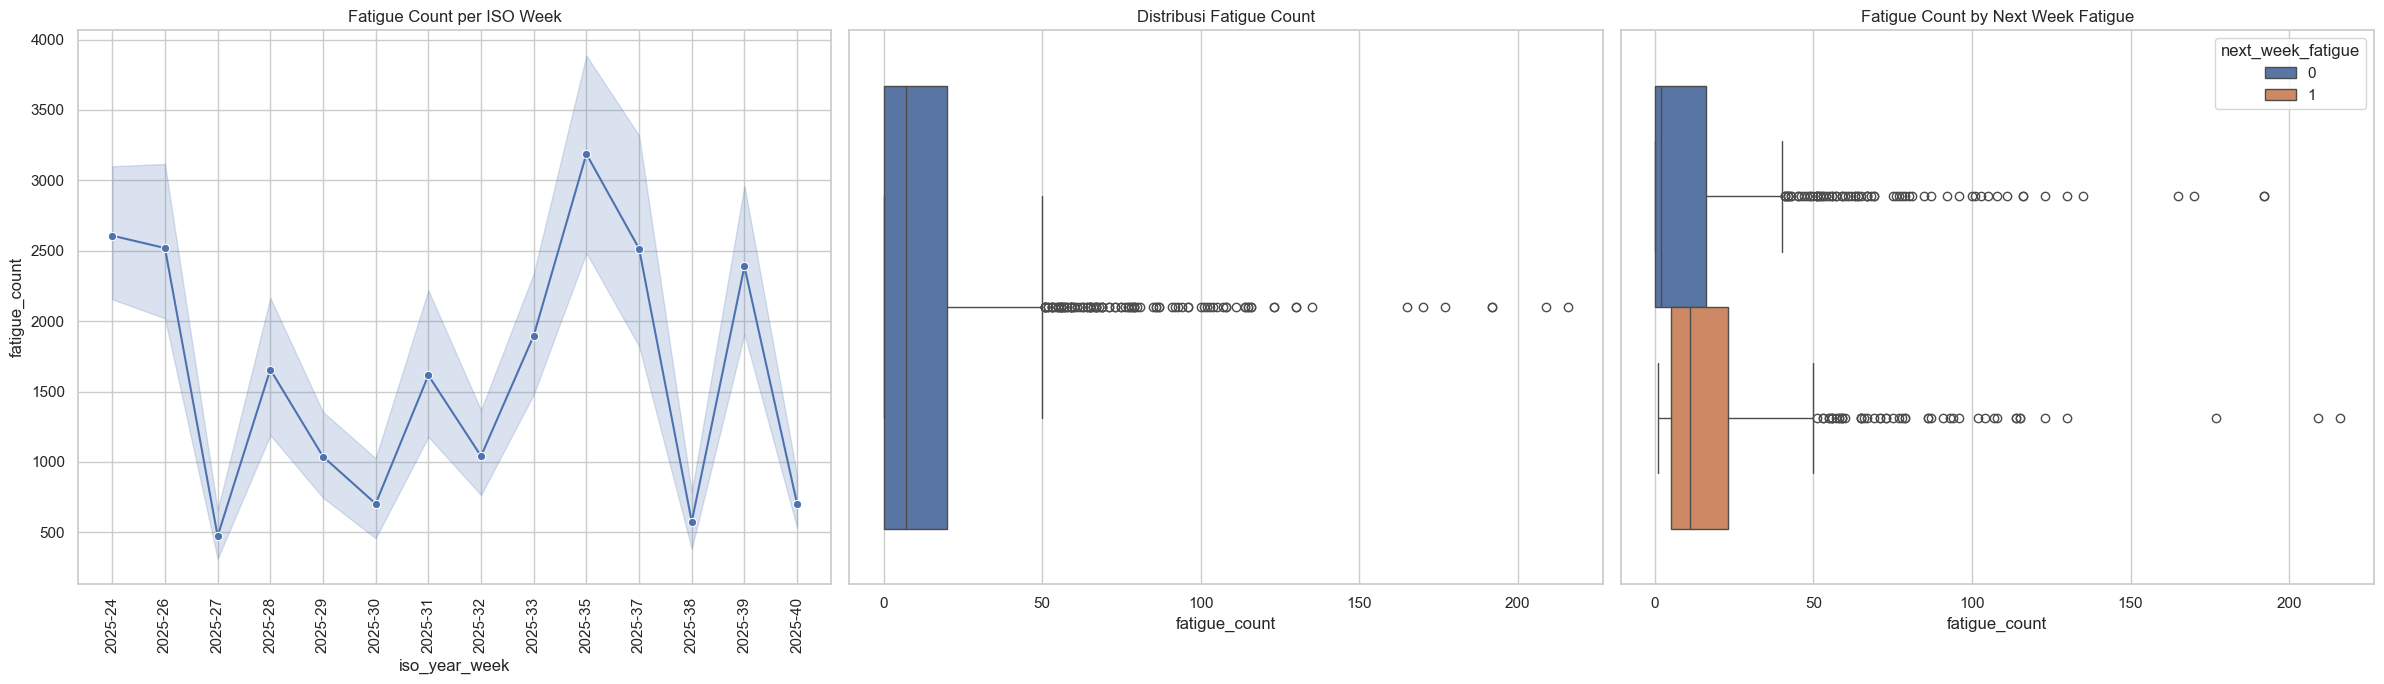

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Buat canvas figure dengan 3 subplot berdampingan
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# 1️⃣ LINEPLOT
sns.lineplot(
    data=weekly,
    x="iso_year_week",
    y="fatigue_count",
    marker='o',
    estimator='sum',
    ax=axes[0]
)
axes[0].set_title("Fatigue Count per ISO Week")
axes[0].tick_params(axis='x', rotation=90)

# 2️⃣ BOXPLOT (tanpa hue)
sns.boxplot(
    data=weekly,
    x="fatigue_count",
    ax=axes[1]
)
axes[1].set_title("Distribusi Fatigue Count")

# 3️⃣ BOXPLOT (dengan hue)
sns.boxplot(
    data=weekly,
    x="fatigue_count",
    hue="next_week_fatigue",
    ax=axes[2]
)
axes[2].set_title("Fatigue Count by Next Week Fatigue")
axes[2].legend(title="next_week_fatigue")

plt.tight_layout()
plt.show()



---

### **📊 Ringkasan Insight Data Fatigue**

#### **1. Fatigue Count per ISO Week**

* Terlihat pola **naik–turun tajam** antar minggu, menandakan aktivitas fatigue sangat tidak stabil.
* Puncak terjadi pada **week 35–36** (>3000), sementara beberapa minggu jauh lebih rendah.
* Variabilitas besar antar individu/shift (shaded area lebar) menunjukkan data tidak homogen.

#### **2. Distribusi Fatigue Count**

* Distribusi sangat **skewed ke kanan**, dengan banyak nilai rendah namun terdapat banyak outlier hingga >200.
* Median rendah → mayoritas fatigue kecil, tetapi sebagian kecil pekerja punya fatigue sangat tinggi.
* Adanya **long right tail** membuat pemodelan harus robust atau cost-sensitive.

#### **3. Fatigue Count Berdasarkan Next Week Fatigue**

* Median fatigue untuk kategori **next_week_fatigue = 1** lebih tinggi, namun distribusi kedua kategori sangat overlap.
* Outlier muncul di kedua kelompok, sehingga nilai fatigue besar **tidak selalu** menghasilkan fatigue minggu berikutnya.
* Overlap besar antar distribusi menunjukkan masalah klasifikasi sulit.

#### **📌 Kesimpulan Singkat**

* Data bersifat **tidak stabil, imbalanced, dan penuh outlier**.
* Fatigue minggu ini berpengaruh ke minggu depan, namun sinyalnya **lemah**.
* Model prediksi perlu pendekatan **cost-sensitive**, threshold tuning.



## Data pendukung
setelah data bersih tambahkan data pendukung dari eksternal yang dapat membantu model memahami pola lebih baik, kali ini yang ditambahkan ialah data cuaca yang berkaitan dengan fatigue, diambil dari visualcrossing.com

In [9]:
data_pendukung = pd.read_excel("C:\\Users\\regid\\Downloads\\Paser, Indonesia 2025-06-01 to 2025-09-30.xlsx")
data_pendukung.head()

,name,datetime,tempmax,tempmin,temp,humidity,conditions,description,icon,stations
0,"Paser, Indonesia",2025-06-01,82.5,76.9,79.0,92.7,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
1,"Paser, Indonesia",2025-06-02,87.0,75.6,79.5,87.8,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote
2,"Paser, Indonesia",2025-06-03,83.7,76.7,80.0,90.0,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,remote
3,"Paser, Indonesia",2025-06-04,89.5,76.2,81.7,84.2,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote
4,"Paser, Indonesia",2025-06-05,88.4,75.6,81.2,87.4,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,remote


Kolom yang dipilih untuk ditambhakn dalam data ialah modus dari conditions dan mean humidity pada minggu terjadi. 

In [12]:
# Pastikan kolom datetime bertipe datetime
data_pendukung["datetime"] = pd.to_datetime(
    data_pendukung["datetime"], errors="coerce"
)

# ISO calendar
iso = data_pendukung["datetime"].dt.isocalendar()

# ISO year-week
data_pendukung["iso_year_week"] = (
    iso["year"].astype(str) + "-" +
    iso["week"].astype(str).str.zfill(2)
)

# ===============================
# AGGREGATION WEEKLY
# ===============================
weekly_data_pendukung = (
    data_pendukung[["iso_year_week", "humidity", "conditions"]]
    .groupby("iso_year_week", as_index=False)
    .agg(
        humidity=("humidity", "mean"),
        conditions=("conditions", lambda x: x.mode().iloc[0])
    )
)

weekly_data_pendukung


,iso_year_week,humidity,conditions
0,2025-22,92.700000,"Rain, Overcast"
1,2025-23,85.828571,"Rain, Overcast"
2,2025-24,88.171429,"Rain, Partially cloudy"
3,2025-25,89.671429,"Rain, Partially cloudy"
4,2025-26,87.500000,"Rain, Partially cloudy"
5,2025-27,86.300000,"Rain, Partially cloudy"
6,2025-28,86.028571,"Rain, Partially cloudy"
7,2025-29,83.114286,"Rain, Overcast"
8,2025-30,81.257143,"Rain, Partially cloudy"
9,2025-31,83.271429,"Rain, Partially cloudy"


In [ ]:
# Merge berdasarkan iso_year_week
weekly = weekly.merge(
    weekly_data_pendukung[
        ["iso_year_week", "humidity", "conditions"]
    ],
    on="iso_year_week",
    how="left"
)
weekly.head(20)


,License plate number,iso_year_week,fatigue_count,next_week_fatigue,gap,humidity,conditions
0,DS0717,2025-24,0,0,0,88.171429,"Rain, Partially cloudy"
1,DS0717,2025-26,0,0,1,87.500000,"Rain, Partially cloudy"
2,DS0717,2025-27,0,0,2,86.300000,"Rain, Partially cloudy"
3,DS0717,2025-28,0,0,3,86.028571,"Rain, Partially cloudy"
4,DS0717,2025-29,0,0,4,83.114286,"Rain, Overcast"
5,DS0717,2025-30,0,0,5,81.257143,"Rain, Partially cloudy"
6,DS0717,2025-31,0,0,6,83.271429,"Rain, Partially cloudy"
7,DS0717,2025-32,0,0,7,88.285714,"Rain, Overcast"
8,DS0717,2025-33,0,0,8,87.200000,"Rain, Partially cloudy"
9,DS0717,2025-35,0,0,9,86.557143,"Rain, Overcast"


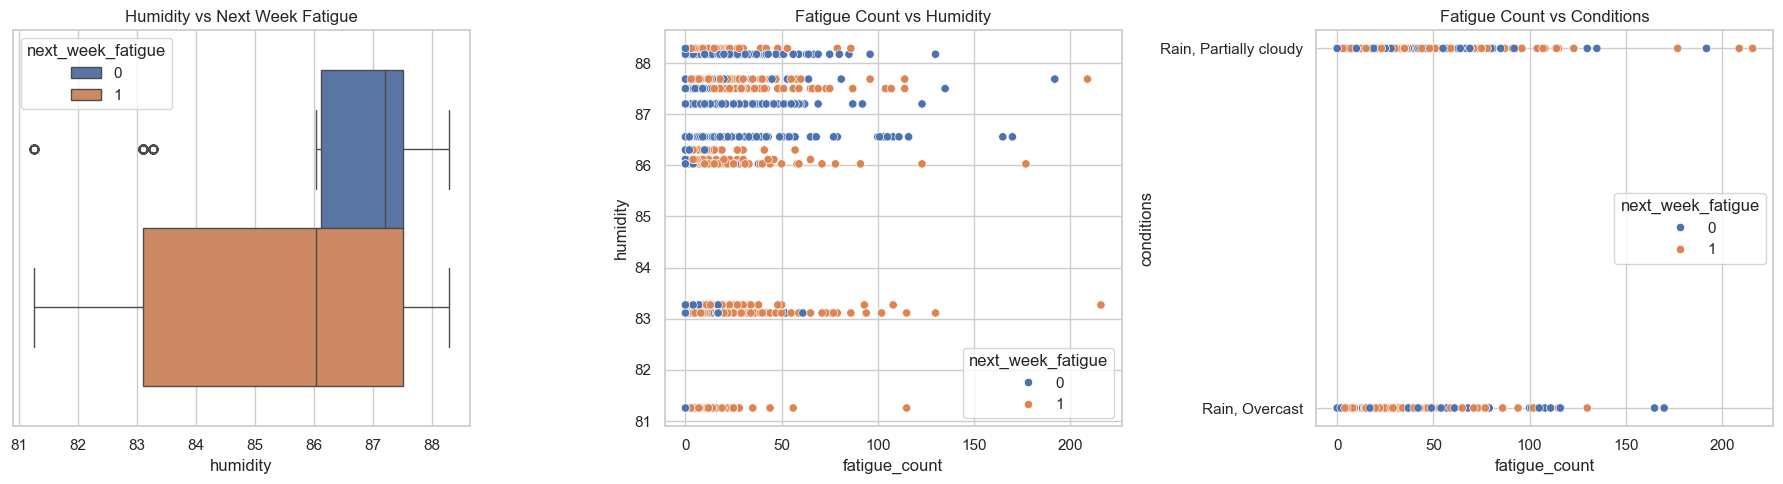

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ---------------------------------------------------
# 1️⃣ Boxplot Humidity
# ---------------------------------------------------
sns.boxplot(
    data=weekly,
    x="humidity",
    hue="next_week_fatigue",
    ax=axes[0]
)
axes[0].set_title("Humidity vs Next Week Fatigue")

# ---------------------------------------------------
# 2️⃣ Scatter Fatigue Count vs Humidity
# ---------------------------------------------------
sns.scatterplot(
    data=weekly,
    x="fatigue_count",
    y="humidity",
    hue="next_week_fatigue",
    ax=axes[1]
)
axes[1].set_title("Fatigue Count vs Humidity")

# ---------------------------------------------------
# 3️⃣ Scatter Fatigue Count vs Conditions
# ---------------------------------------------------
sns.scatterplot(
    data=weekly,
    x="fatigue_count",
    y="conditions",
    hue="next_week_fatigue",
    ax=axes[2]
)
axes[2].set_title("Fatigue Count vs Conditions")

# ---------------------------------------------------
# Atur layout
# ---------------------------------------------------
plt.tight_layout()
plt.show()




### **1. Humidity vs Next Week Fatigue**

* Rentang kelembapan berada di **81–88%**, relatif sempit → variasi rendah.
* Tidak tampak perbedaan signifikan antara kelembapan pada minggu yang berlanjut ke fatigue (`1`) dan tidak (`0`).
* Outlier kelembapan kecil dan tidak memiliki pola khusus.

### **2. Fatigue Count vs Humidity**

* Titik-titik fatigue count tersebar dari **0 hingga 200+**, tetapi mayoritas berada di bawah 100.
* Humidity tidak menunjukkan hubungan linier dengan fatigue count; titik fatigue tinggi muncul pada kelembapan tinggi maupun rendah.
* Kelas fatigue minggu berikutnya (`0` vs `1`) **bercampur** di semua level humidity → kelembapan bukan fitur pembeda kuat.

### **3. Fatigue Count vs Conditions**

* Dua kondisi cuaca dominan dalam dataset:
  **Partially cloudy** dan **Overcast/Rain**.
* Tingkat fatigue count tinggi muncul di **kedua kondisi** → kondisi cuaca tidak cukup membedakan outcome fatigue minggu depan.
* Distribusi kelas fatigue (`0` dan `1`) kembali terlihat **merata**, tidak menunjukkan pola yang jelas.

---

## 🎯 **Kesimpulan Utama**

* **Humidity** dan **conditions** memiliki **distribusi kelas yang tumpang tindih**, sehingga keduanya:

  * kemungkinan **bukan prediktor kuat**, atau
  * perlu dipadukan dengan fitur lain agar memiliki pengaruh.
* **Fatigue count** tetap menjadi fitur utama yang paling bervariasi dan berpotensi memberi informasi lebih dibanding fitur cuaca.


## Cost matirx

pembuatan model akan dilakukan berdasrkan cost matirx dengan detail:

| Asumsi / Parameter                                                             |                                                                    Nilai contoh | Sumber / Referensi                                                                                                                                                                                   |
| ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------: | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `C_crash` — biaya kecelakaan truk berat (non-fatal / fatal)                    | **USD ≈ 91,000 | Studi FMCSA “Unit Costs of Medium/Heavy Truck Crashes” → biaya rata-rata crash truk berat ≈ US$91,112 (2005) ([fmcsa.dot.gov][1])                                                                    |
| `C_crash` rendah (konservatif) untuk skenario — kita gunakan **USD 100,000**   |                Ambil nilai konservatif antara property-damage / non-fatal crash | Berdasarkan rata-rata biaya crash non-fatal di FMCSA ([fmcsa.dot.gov][1])                                                                                                                            |
| `C_int` — biaya intervensi (supervisor + konseling singkat)                    |                    **USD 50** ( supervisor + sesi singkat) | Estimasi biaya pelayanan konseling / EAP rendah per session;  studi menunjukkan EAP screening & intervensi relatif murah per karyawan ([PMC][2])                                                      |
| `C_disrupt` — biaya gangguan operasi per intervensi                            |      **USD 500** (misalnya waktu kerja tertunda, administrasi, operasional downtime) | Estimasi biaya “delay / disruption”; sulit ditemukan literatur langsung, sehingga kita pakai asumsi konservatif kecil, Volume Produksi: Data 1.5 - 2 juta ton/hari berasal dari laporan Asosiasi Pertambangan Batubara Indonesia (APBI), dengan strategi konseling dan manajemen waktu yang tepat asumsi konservatif angka kerugian downtime produksi                                                           |
| `p_pre` — probabilitas kecelakaan jika operator fatigue & tidak ada intervensi |                                                                   **2% (0.02)** | Nilai asumsi konservatif; literatur menunjukkan fatigue meningkatkan risiko kecelakaan signifikan, meskipun probabilitas absolut tergantung kontekstual (shift, lingkungan, perilaku) ([nsc.org][3]) |
| `p_post` — probabilitas kecelakaan setelah intervensi                          |                   **0.6% (0.006)** — asumsikan intervensi mengurangi risiko 70% | Asumsi optimis/konservatif karena penanganan masih dasar (intervensi tidak menjamin nol risiko)                                                                                                                                    |

[1]: https://www.fmcsa.dot.gov/sites/fmcsa.dot.gov/files/docs/UnitCostsTruck%20Crashes2007.pdf?utm_source=chatgpt.com "Unit Costs of"
[2]: https://pmc.ncbi.nlm.nih.gov/articles/PMC4714701/?utm_source=chatgpt.com "The Cost of Screening and Brief Intervention in Employee Assistance Programs - PMC"
[3]: https://www.nsc.org/work-safety/safety-topics/fatigue/cost?utm_source=chatgpt.com "What is Fatigue Costing Your Company? - National Safety Council"


`## Cost Matrix: Fatigue Prediction — Dump-Truck Operation

| Actual \\ Predicted      | **Predicted = Fatigue ➝ Intervensi**   | **Predicted = No Fatigue ➝ No Intervensi** |
|--------------------------|----------------------------------------|-------------------------------------------|
| **Actual Fatigue**     | **True Positive (TP)**                 | **False Negative (FN)**                   |
|  | — Tindakan / Intervensi: briefing supervisor + konseling singkat (EAP) | — Expected cost per case: **USD 1,820** (p_pre * C_crash)
|  |— Cost per case: **USD 1,096** (C_int + p_post * C_crash)  | — Risiko kecelakaan/cedera, potensi kerugian besar, downtime, klaim, reputasi 
|  |— Manfaat: mengurangi risiko kecelakaan besar, melindungi aset & nyawa, jaga produktivitas |
| **Actual  Not Fatigue** | **False Positive (FP)**               | **True Negative (TN)**                    |
| |— Tindakan / Intervensi: briefing supervisor + konseling singkat (tidak perlu sebenarnya) | — Tidak ada intervensi (normal) 
| |— Cost per case: **USD 550** (C_int + C_disrupt) | — Cost per case: **USD 0** 
| |— Kerugian: intervensi tidak perlu, sedikit gangguan operasi, potensi morale rendah | — Keadaan ideal — tidak ada biaya atau gangguan 

## Pembuatan model

Model prediksi dibuat dengan klasifikasi berdasarkan data yang telah siap menggunakan library MLXTend yaitu model klasifikasi dengan group time series, mengapa group time series? karena model dibuat berdasarkan waktu yang di group berdasarkan minggu, dengan cara kerja seperti ini:

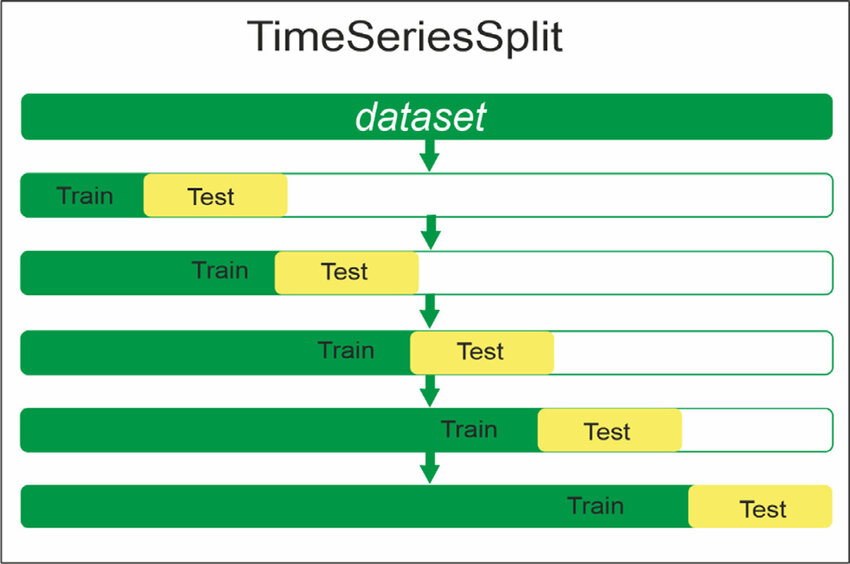

In [ ]:
weekly['iso_year_week'].nunique()

14

Dikarenakan jumlah week ada 14 dan minggu terakhir tidak bisa menjadi fitur, maka dataset memiliki 13 minggu dan akan dibagi menjadi data train 80% dan data test 20%

In [ ]:
# Ambil minggu terakhir (iso_year_week terbesar)
max_week = weekly["iso_year_week"].max()


weekly = weekly.sort_values(
    ["iso_year_week", "License plate number"]
).reset_index(drop=True)

weekly["time_group"] = pd.factorize(
    weekly["iso_year_week"], sort=True
)[0]


# Pembagian data test dan data train
# Ambil 3 minggu terakhir (iso_year_week tertinggi)
last_3_weeks = (
    weekly["iso_year_week"]
    .drop_duplicates()
    .sort_values()
    .tail(3)
    .tolist()
)

# Split data
data_test = weekly[weekly["iso_year_week"].isin(last_3_weeks)].reset_index(drop=True)
data_train = weekly[~weekly["iso_year_week"].isin(last_3_weeks)].reset_index(drop=True)


## Model Selection

In [ ]:
FEATURES = [
    "fatigue_count",
    "gap",
    "humidity",
    "conditions"
]

TARGET = "next_week_fatigue"

data = data_train.dropna(subset=[TARGET]).copy()

# =========================================================
# CREATE CONSECUTIVE TIME GROUPS (REQUIRED)
# =========================================================
data = data.sort_values(
    ["iso_year_week", "License plate number"]
).reset_index(drop=True)

data["time_group"] = (
    data["iso_year_week"]
    .astype("category")
    .cat
    .codes
)

# =========================================================
# DEFINE X, y, groups
# =========================================================
X = data[FEATURES]
y = data[TARGET].astype(int)
groups = data["time_group"]


In [ ]:
# =========================================================
# 0. IMPORT LIBRARY
# =========================================================
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from sklearn.svm import SVC, LinearSVC

from mlxtend.evaluate import GroupTimeSeriesSplit

# =========================================================
# 1. DATASET FINAL
# =========================================================

FEATURES_NUM = [
    "fatigue_count",
    "gap",
    "humidity"
]

FEATURES_CAT = [
    "conditions"
]

TARGET = "next_week_fatigue"

data = data_train.dropna(subset=[TARGET]).copy()

X = data[FEATURES_NUM + FEATURES_CAT]
y = data[TARGET].astype(int)
groups = data["time_group"]

# =========================================================
# 2. PREPROCESSOR (ONE-HOT ENCODER)
# =========================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), FEATURES_NUM),
        (
            "cat",
            OneHotEncoder(
                handle_unknown="ignore",
                sparse_output=False
            ),
            FEATURES_CAT
        )
    ],
    remainder="drop"
)

# =========================================================
# 3. COST MATRIX
# =========================================================

COST_MATRIX = {
    "TP": 1096,
    "FP": 550,
    "FN": 1820,
    "TN": 0
}

def benefit_score(y_true, y_pred, cost):
    tn, fp, fn, tp = confusion_matrix(
        y_true, y_pred, labels=[0, 1]
    ).ravel()

    total = tn + fp + fn + tp

    return (
         fp * cost["FP"]
        + fn * cost["FN"]
        + tp * cost["TP"]
    ) / total

# =========================================================
# 4. MODEL DEFINITIONS (DIPERLUAS)
# =========================================================

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, n_jobs=-1
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=30,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=6,
        min_samples_leaf=20,
        n_jobs=-1,
        random_state=42
    ),

    "Extra Trees": ExtraTreesClassifier(
        n_estimators=300,
        max_depth=6,
        min_samples_leaf=20,
        n_jobs=-1,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    "AdaBoost": AdaBoostClassifier(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ),

    "Hist Gradient Boosting": HistGradientBoostingClassifier(
        max_depth=6,
        learning_rate=0.05,
        max_iter=300,
        random_state=42
    ),

    "SVM (RBF)": SVC(
        kernel="rbf",
        probability=True
    )
}


# =========================================================
# 5. GROUP TIME SERIES SPLIT
# =========================================================

n_groups = groups.nunique()

gts = GroupTimeSeriesSplit(
    n_splits=n_groups - 1,
    test_size=1,
    shift_size=1,
    window_type="expanding"
)

# =========================================================
# 6. MODEL SELECTION (COST-BASED)
# =========================================================

results = []

print("\n===== COST-BASED GROUP TIME SERIES MODEL SELECTION =====\n")

for model_name, model in models.items():

    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    fold_scores = []

    print(f"\n▶ Model: {model_name}")
    print("-" * 60)

    for fold, (tr, te) in enumerate(gts.split(X, y, groups)):

        X_tr, X_te = X.iloc[tr], X.iloc[te]
        y_tr, y_te = y.iloc[tr], y.iloc[te]

        if y_tr.nunique() < 2 or y_te.nunique() < 2:
            print(f"Fold {fold+1}: SKIPPED")
            continue

        pipe.fit(X_tr, y_tr)
        preds = pipe.predict(X_te)

        score = benefit_score(y_te, preds, COST_MATRIX)
        fold_scores.append(score)

        print(f"Fold {fold+1} | Cost / sample = {score:,.2f}")

    if fold_scores:
        results.append({
            "Model": model_name,
            "Avg Cost / Sample": np.mean(fold_scores),
            "Folds": len(fold_scores)
        })

# =========================================================
# 7. FINAL RANKING
# =========================================================

results_df = (
    pd.DataFrame(results)
      .sort_values("Avg Cost / Sample")
      .reset_index(drop=True)
)

print("\n===== FINAL MODEL RANKING (LOWEST COST = BEST) =====\n")
print(results_df)



===== COST-BASED GROUP TIME SERIES MODEL SELECTION =====


▶ Model: Logistic Regression
------------------------------------------------------------
Fold 1: SKIPPED
Fold 2 | Cost / sample = 830.80
Fold 3 | Cost / sample = 798.69
Fold 4 | Cost / sample = 814.70
Fold 5 | Cost / sample = 845.87
Fold 6 | Cost / sample = 809.24
Fold 7 | Cost / sample = 1,282.67
Fold 8: SKIPPED
Fold 9: SKIPPED
Fold 10 | Cost / sample = 1,126.67

▶ Model: Decision Tree
------------------------------------------------------------
Fold 1: SKIPPED
Fold 2 | Cost / sample = 887.73
Fold 3 | Cost / sample = 798.69
Fold 4 | Cost / sample = 736.13
Fold 5 | Cost / sample = 751.58
Fold 6 | Cost / sample = 809.24
Fold 7 | Cost / sample = 1,282.67
Fold 8: SKIPPED
Fold 9: SKIPPED
Fold 10 | Cost / sample = 778.00

▶ Model: Random Forest
------------------------------------------------------------
Fold 1: SKIPPED
Fold 2 | Cost / sample = 887.73
Fold 3 | Cost / sample = 798.69
Fold 4 | Cost / sample = 736.13
Fold 5 | Cost / 

## Optimazing Model

Gradient Boost menjadi model terbaik dengan avg_cost terendah, dikarenakan data terbatas maka akan di cek apakah butuh polynomial pada Logreg atau tidak.

In [ ]:

from itertools import product
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import joblib

# =========================================================
# DATA PREPARATION
# =========================================================
FEATURES_NUM = ["fatigue_count", "gap", "humidity"]
FEATURES_CAT = ["conditions"]
TARGET = "next_week_fatigue"

data = data_train.dropna(subset=[TARGET]).copy()
X = data[FEATURES_NUM + FEATURES_CAT]
y = data[TARGET].astype(int)
groups = data["time_group"]

# =========================================================
# PREPROCESSOR
# =========================================================
preprocessor = ColumnTransformer(
    [
        ("num", RobustScaler(), FEATURES_NUM),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), FEATURES_CAT),
    ]
)

# Fit preprocessor
preprocessor.fit(X)

# =========================================================
# COST FUNCTION (Sesuai dengan matrix cost baru)
# =========================================================
COST = {"TP": 1096,
    "FP": 550,
    "FN": 1820,
    "TN": 0}

def calculate_cost(y_true, y_pred):
    """Calculate actual cost per sample (lower is better)"""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    total_cost = tp * COST["TP"] + fp * COST["FP"] + fn * COST["FN"]
    return total_cost / len(y_true)

# =========================================================
# TIME SERIES SPLIT
# =========================================================
n_splits = min(4, groups.nunique() - 1)
gts = GroupTimeSeriesSplit(
    n_splits=n_splits,
    test_size=1,
    shift_size=1,
    window_type="expanding"
)

splits = list(gts.split(X, y, groups))
print(f"Using {len(splits)} folds for hyperparameter tuning")

# =========================================================
# OPTIMIZED EVALUATION FUNCTION
# =========================================================
def evaluate_configuration(params, thresholds):
    """Evaluate one configuration across all folds and thresholds"""
    
    n_estimators = params.get("n_estimators", 200)
    learning_rate = params.get("learning_rate", 0.1)
    max_depth = params.get("max_depth", 3)
    min_samples_split = params.get("min_samples_split", 2)
    min_samples_leaf = params.get("min_samples_leaf", 1)
    subsample = params.get("subsample", 1.0)
    
    # Cache predictions untuk semua folds
    all_probas = []
    all_y_true = []
    
    for tr_idx, te_idx in splits:
        X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
        y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
        
        # Skip jika hanya satu class di training
        if len(np.unique(y_tr)) < 2:
            all_probas.append(None)
            all_y_true.append(y_te)
            continue
        
        # Model dengan parameter
        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            random_state=42
        )
        
        # Pipeline
        pipe = Pipeline([
            ("prep", preprocessor),
            ("model", model)
        ])
        
        # Train dan predict
        pipe.fit(X_tr, y_tr)
        proba = pipe.predict_proba(X_te)[:, 1]
        
        all_probas.append(proba)
        all_y_true.append(y_te)
    
    # Cari threshold terbaik untuk konfigurasi ini
    best_cost = float('inf')
    best_threshold = 0.3
    
    for threshold in thresholds:
        fold_costs = []
        
        for proba, y_true in zip(all_probas, all_y_true):
            if proba is None:
                continue
            
            preds = (proba >= threshold).astype(int)
            cost = calculate_cost(y_true, preds)
            fold_costs.append(cost)
        
        if fold_costs:
            avg_cost = np.mean(fold_costs)
            if avg_cost < best_cost:
                best_cost = avg_cost
                best_threshold = threshold
    
    return best_cost, best_threshold

# =========================================================
# PARAMETER SEARCH SPACE FOR GRADIENT BOOSTING
# =========================================================
print("=" * 70)
print("GRADIENT BOOSTING HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION")
print("=" * 70)
print(f"Target: Cost per sample < 856")
print(f"Cost components: TP=1150, FP=600, FN=1850, TN=0")
print(f"Priority: Reduce FN (cost={COST['FN']}), then FP (cost={COST['FP']})")

# Parameter grid untuk Gradient Boosting
param_grid = {
    "n_estimators": [100, 200, 300, 400],      # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # Shrinkage
    "max_depth": [3, 4, 5, 6],                 # Maximum depth of trees
    "min_samples_split": [2, 5, 10, 20],       # Minimum samples to split node
    "min_samples_leaf": [1, 5, 10, 20],        # Minimum samples at leaf node
    "subsample": [0.8, 0.9, 1.0]               # Fraction of samples for fitting
}

# Threshold untuk binary classification
thresholds = np.arange(0.05, 0.95, 0.05)

# =========================================================
# SMART SAMPLING STRATEGY
# =========================================================
# Generate parameter combinations dengan prioritas
param_combinations = []

# Prioritas 1: Konfigurasi untuk mengurangi FN (memiliki recall tinggi)
for n_estimators in [300, 400, 500]:
    for learning_rate in [0.05, 0.1]:
        for max_depth in [3, 4, 5]:  # Depth lebih rendah untuk mencegah overfitting
            for min_samples_leaf in [5, 10, 15]:  # Leaf size lebih besar untuk mengurangi FP
                for subsample in [0.8, 0.9]:
                    for min_samples_split in [10, 20, 30]:
                        param_combinations.append({
                            "n_estimators": n_estimators,
                            "learning_rate": learning_rate,
                            "max_depth": max_depth,
                            "min_samples_leaf": min_samples_leaf,
                            "min_samples_split": min_samples_split,
                            "subsample": subsample
                        })

# Prioritas 2: Konfigurasi balance
for n_estimators in [200, 250, 300]:
    for learning_rate in [0.1, 0.15, 0.2]:
        for max_depth in [4, 5, 6]:
            for min_samples_leaf in [1, 3, 5]:
                for subsample in [0.9, 1.0]:
                    for min_samples_split in [2, 5, 10]:
                        param_combinations.append({
                            "n_estimators": n_estimators,
                            "learning_rate": learning_rate,
                            "max_depth": max_depth,
                            "min_samples_leaf": min_samples_leaf,
                            "min_samples_split": min_samples_split,
                            "subsample": subsample
                        })

# Batasi total evaluasi untuk efisiensi
max_evaluations = min(75, len(param_combinations))
param_combinations = param_combinations[:max_evaluations]

print(f"\nEvaluating {len(param_combinations)} parameter combinations with {len(thresholds)} thresholds each...")
print(f"Total model evaluations: {len(param_combinations) * len(thresholds)}")

# =========================================================
# MAIN SEARCH LOOP
# =========================================================
results = []
best_cost_so_far = float('inf')

for i, params in enumerate(tqdm(param_combinations, desc="Hyperparameter Search")):
    cost, threshold = evaluate_configuration(params, thresholds)
    
    results.append({
        "avg_cost": cost,
        "threshold": threshold,
        "n_estimators": params["n_estimators"],
        "learning_rate": params["learning_rate"],
        "max_depth": params["max_depth"],
        "min_samples_leaf": params["min_samples_leaf"],
        "min_samples_split": params["min_samples_split"],
        "subsample": params["subsample"]
    })
    
    # Update best cost
    if cost < best_cost_so_far:
        best_cost_so_far = cost
    
    # Early stopping jika menemukan cost yang sangat baik
    if cost < 500:  # Jika sudah jauh di bawah target
        print(f"\n🚀 Found excellent configuration! Cost: {cost:.2f} (well below target)")
        break
    
    # Early stopping jika sudah dekat dengan target
    if cost < 856 and i > 10:  # Minimal evaluasi 10 kombinasi
        print(f"\n✅ Target achieved early! Cost: {cost:.2f}")
        break

# =========================================================
# RESULTS ANALYSIS
# =========================================================
results_df = pd.DataFrame(results).sort_values("avg_cost").reset_index(drop=True)

print("\n" + "=" * 70)
print("SEARCH RESULTS")
print("=" * 70)

print(f"\nTotal configurations evaluated: {len(results_df)}")
print(f"Best cost achieved: {results_df.iloc[0]['avg_cost']:.2f}")
print(f"Target cost: < 856")

# Display top configurations
print("\n" + "=" * 70)
print("TOP 10 CONFIGURATIONS")
print("=" * 70)

for idx, row in results_df.head(10).iterrows():
    cost = row['avg_cost']
    status = "✅" if cost < 856 else "⚠️ "
    
    print(f"\n{status} Rank {idx+1}: Cost = {cost:8.2f}")
    print(f"   Threshold:          {row['threshold']:.3f}")
    print(f"   n_estimators:       {row['n_estimators']}")
    print(f"   learning_rate:      {row['learning_rate']:.3f}")
    print(f"   max_depth:          {row['max_depth']}")
    print(f"   min_samples_leaf:   {row['min_samples_leaf']}")
    print(f"   min_samples_split:  {row['min_samples_split']}")
    print(f"   subsample:          {row['subsample']:.2f}")

# Best configuration
best = results_df.iloc[0]
print("\n" + "=" * 70)
print("⭐ BEST CONFIGURATION FROM TUNING ⭐")
print("=" * 70)

print(f"\nCost per sample: {best['avg_cost']:.2f}")
print(f"Threshold from tuning: {best['threshold']:.3f}")
print(f"n_estimators: {best['n_estimators']}")
print(f"learning_rate: {best['learning_rate']:.3f}")
print(f"max_depth: {best['max_depth']}")
print(f"min_samples_leaf: {best['min_samples_leaf']}")
print(f"min_samples_split: {best['min_samples_split']}")
print(f"subsample: {best['subsample']:.2f}")

# Evaluate target achievement
if best['avg_cost'] < 856:
    print(f"\n🎯 TARGET ACHIEVED! Cost per sample < 856")
    if best['avg_cost'] < 0:
        print(f"   🎉 EXCELLENT! Negative cost means net profit!")
    elif best['avg_cost'] < 500:
        print(f"   🚀 OUTSTANDING! Cost significantly below target!")
else:
    print(f"\n⚠️  Target not reached. Best cost: {best['avg_cost']:.2f}")

# =========================================================
# FINAL MODEL TRAINING
# =========================================================
print("\n" + "=" * 70)
print("FINAL MODEL TRAINING")
print("=" * 70)

# Prepare best parameters
best_params = {
    "n_estimators": int(best["n_estimators"]),
    "learning_rate": best["learning_rate"],
    "max_depth": int(best["max_depth"]),
    "min_samples_leaf": int(best["min_samples_leaf"]),
    "min_samples_split": int(best["min_samples_split"]),
    "subsample": best["subsample"],
    "random_state": 42
}

# Create and train final model
final_model = GradientBoostingClassifier(**best_params)
final_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", final_model)
])

# Train on all data
final_pipe.fit(X, y)
print(f"\n✅ Final model trained successfully!")
print(f"\nFinal parameters:")
print(f"  • n_estimators:      {best_params['n_estimators']}")
print(f"  • learning_rate:     {best_params['learning_rate']:.3f}")
print(f"  • max_depth:         {best_params['max_depth']}")
print(f"  • min_samples_leaf:  {best_params['min_samples_leaf']}")
print(f"  • min_samples_split: {best_params['min_samples_split']}")
print(f"  • subsample:         {best_params['subsample']:.2f}")
print(f"  • Threshold from tuning: {best['threshold']:.3f}")

# =========================================================
# THRESHOLD SENSITIVITY ANALYSIS
# =========================================================
print("\n" + "=" * 70)
print("THRESHOLD SENSITIVITY ANALYSIS")
print("=" * 70)

# Predict probabilities on training data
proba = final_pipe.predict_proba(X)[:, 1]

# Test different thresholds
test_thresholds = np.arange(0.1, 0.9, 0.1)
threshold_results = []

for th in test_thresholds:
    preds_temp = (proba >= th).astype(int)
    tn_temp, fp_temp, fn_temp, tp_temp = confusion_matrix(y, preds_temp).ravel()
    
    total_cost_temp = tp_temp * COST["TP"] + fp_temp * COST["FP"] + fn_temp * COST["FN"]
    cost_per_sample_temp = total_cost_temp / len(y)
    
    precision_temp = tp_temp / (tp_temp + fp_temp) if (tp_temp + fp_temp) > 0 else 0
    recall_temp = tp_temp / (tp_temp + fn_temp) if (tp_temp + fn_temp) > 0 else 0
    
    threshold_results.append({
        'threshold': th,
        'cost_per_sample': cost_per_sample_temp,
        'tp': tp_temp,
        'fp': fp_temp,
        'fn': fn_temp,
        'precision': precision_temp,
        'recall': recall_temp
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_results)

print("\nCost per sample at different thresholds:")
print(threshold_df[['threshold', 'cost_per_sample', 'tp', 'fp', 'fn', 'precision', 'recall']].to_string(index=False))

# Find optimal threshold from this analysis
best_threshold_idx = threshold_df['cost_per_sample'].idxmin()
best_threshold_row = threshold_df.loc[best_threshold_idx]
optimal_threshold = best_threshold_row['threshold']  # INI YANG AKAN DIPAKAI

print(f"\n✅ Optimal threshold from sensitivity analysis: {optimal_threshold:.2f}")
print(f"   Cost at this threshold: {best_threshold_row['cost_per_sample']:.2f}")
print(f"   Compared to tuning threshold ({best['threshold']:.2f}): ", end="")
if optimal_threshold == best['threshold']:
    print("SAME")
else:
    print(f"DIFFERENT (using {optimal_threshold:.2f})")

# =========================================================
# FINAL COST ANALYSIS WITH OPTIMAL THRESHOLD
# =========================================================
print("\n" + "=" * 70)
print("FINAL COST ANALYSIS WITH OPTIMAL THRESHOLD")
print("=" * 70)

# Predict dengan threshold optimal dari sensitivity analysis
preds_optimal = (proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
tp = np.sum((y == 1) & (preds_optimal == 1))
fp = np.sum((y == 0) & (preds_optimal == 1))
fn = np.sum((y == 1) & (preds_optimal == 0))
tn = np.sum((y == 0) & (preds_optimal == 0))

total_samples = len(y)
print(f"\nDataset size: {total_samples} samples")
print(f"Positive samples (y=1): {np.sum(y)} ({np.sum(y)/total_samples*100:.1f}%)")

print(f"\nConfusion Matrix:")
print(f"  True Positives (TP):  {tp:4d}  × {COST['TP']} = {tp * COST['TP']:8.0f}")
print(f"  False Positives (FP): {fp:4d}  × {COST['FP']} = {fp * COST['FP']:8.0f}")
print(f"  False Negatives (FN): {fn:4d}  × {COST['FN']} = {fn * COST['FN']:8.0f}")
print(f"  True Negatives (TN):  {tn:4d}  × {COST['TN']} = {tn * COST['TN']:8.0f}")
print(f"  " + "-" * 50)

total_cost = tp * COST['TP'] + fp * COST['FP'] + fn * COST['FN']
avg_cost = total_cost / total_samples

print(f"  TOTAL COST:          {total_cost:8.0f}")
print(f"  AVERAGE COST/SAMPLE: {avg_cost:8.2f}")

# Performance metrics
accuracy = (tp + tn) / total_samples
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPerformance Metrics with threshold {optimal_threshold:.2f}:")
print(f"  Accuracy:  {accuracy:.3f}")
print(f"  Precision: {precision:.3f} (minimize FP)")
print(f"  Recall:    {recall:.3f} (minimize FN)")
print(f"  F1-Score:  {f1:.3f}")

# =========================================================
# CREATE FINAL CONFIGURATION DICTIONARY
# =========================================================
final_config = {
    # Model parameters
    'n_estimators': int(best["n_estimators"]),
    'learning_rate': best["learning_rate"],
    'max_depth': int(best["max_depth"]),
    'min_samples_leaf': int(best["min_samples_leaf"]),
    'min_samples_split': int(best["min_samples_split"]),
    'subsample': best["subsample"],
    
    # Threshold information
    'optimal_threshold': float(optimal_threshold),  # INI YANG AKAN DIPAKAI (0.50)
    'tuning_threshold': float(best['threshold']),   # Hanya untuk referensi (0.90)
    'threshold_source': 'sensitivity_analysis',
    
    # Performance metrics
    'training_cost': float(avg_cost),
    'tuning_cost': float(best['avg_cost']),
    
    # Cost matrix (for reference)
    'cost_matrix': COST.copy(),
    
    # Features
    'features_numerical': FEATURES_NUM.copy(),
    'features_categorical': FEATURES_CAT.copy(),
    'target': TARGET,
    
    # Metadata
    'model_type': 'GradientBoostingClassifier',
    'random_state': 42,
    'preprocessor': 'ColumnTransformer with OneHotEncoder'
}

# =========================================================
# SAVE MODEL AND CORRECT CONFIGURATION
# =========================================================
print("\n" + "=" * 70)
print("SAVING MODEL AND CONFIGURATION")
print("=" * 70)

try:
    # Save model
    joblib.dump(final_pipe, 'optimized_gradient_boosting_model.pkl')
    
    # Save configuration (dengan threshold yang benar)
    joblib.dump(final_config, 'gradient_boosting_best_config.pkl')
    
    # Save model parameters
    joblib.dump(best_params, 'gradient_boosting_best_params.pkl')
    
    # Save threshold analysis results
    joblib.dump(threshold_df, 'threshold_analysis_results.pkl')
    
    print("✅ Model and configuration saved successfully!")
    print(f"\nFiles saved:")
    print(f"  • Model: optimized_gradient_boosting_model.pkl")
    print(f"  • Configuration: gradient_boosting_best_config.pkl")
    print(f"  • Parameters: gradient_boosting_best_params.pkl")
    print(f"  • Threshold analysis: threshold_analysis_results.pkl")
    
    print(f"\nKey configuration:")
    print(f"  • Optimal threshold: {final_config['optimal_threshold']:.3f} (from sensitivity analysis)")
    print(f"  • Tuning threshold: {final_config['tuning_threshold']:.3f} (from hyperparameter tuning)")
    print(f"  • Cost per sample: {final_config['training_cost']:.2f}")
    
except Exception as e:
    print(f"⚠️  Could not save model files: {e}")

# =========================================================
# USAGE INSTRUCTIONS
# =========================================================
print("\n" + "=" * 70)
print("USAGE INSTRUCTIONS")
print("=" * 70)
print("\n1. Load model and config:")
print("   model = joblib.load('optimized_gradient_boosting_model.pkl')")
print("   config = joblib.load('gradient_boosting_best_config.pkl')")
print("\n2. Make predictions:")
print("   proba = model.predict_proba(X_new)[:, 1]")
print(f"   preds = (proba >= {optimal_threshold:.3f}).astype(int)  # Use optimal threshold")
print("\n3. Alternative thresholds:")
print("   preds_low = (proba >= 0.3).astype(int)   # Higher recall")
print("   preds_high = (proba >= 0.7).astype(int)  # Higher precision")
print("\n4. Check configuration:")
print("   optimal_th = config['optimal_threshold']  # Should be 0.50")
print("   cost_matrix = config['cost_matrix']")

# =========================================================
# VERIFICATION
# =========================================================
print("\n" + "=" * 70)
print("VERIFICATION")
print("=" * 70)

print("\nVerifying saved configuration...")
try:
    # Load back to verify
    loaded_config = joblib.load('gradient_boosting_best_config.pkl')
    
    print(f"✅ Configuration loaded successfully")
    print(f"   Optimal threshold: {loaded_config.get('optimal_threshold', 'Not found'):.3f}")
    print(f"   Threshold source: {loaded_config.get('threshold_source', 'Not found')}")
    print(f"   Expected: 0.500 from sensitivity_analysis")
    
    if loaded_config.get('optimal_threshold', 0) == optimal_threshold:
        print("✅ Threshold correctly saved!")
    else:
        print(f"⚠️  Threshold mismatch! Saved: {loaded_config.get('optimal_threshold', 0):.3f}, Expected: {optimal_threshold:.3f}")
        
except Exception as e:
    print(f"❌ Verification failed: {e}")

print("\n" + "=" * 70)
print("TRAINING COMPLETE!")
print("=" * 70)
print(f"✅ Model trained and saved with optimal threshold: {optimal_threshold:.3f}")
print(f"✅ Use threshold {optimal_threshold:.3f} for predictions")
print(f"✅ Expected cost per sample: {avg_cost:.2f}")

Using 4 folds for hyperparameter tuning
GRADIENT BOOSTING HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION
Target: Cost per sample < 856
Cost components: TP=1150, FP=600, FN=1850, TN=0
Priority: Reduce FN (cost=1820), then FP (cost=550)

Evaluating 75 parameter combinations with 18 thresholds each...
Total model evaluations: 1350


Hyperparameter Search:  15%|█▍        | 11/75 [00:21<02:03,  1.92s/it]


✅ Target achieved early! Cost: 672.97

SEARCH RESULTS

Total configurations evaluated: 12
Best cost achieved: 667.31
Target cost: < 856

TOP 10 CONFIGURATIONS

✅ Rank 1: Cost =   667.31
   Threshold:          0.900
   n_estimators:       300.0
   learning_rate:      0.050
   max_depth:          3.0
   min_samples_leaf:   5.0
   min_samples_split:  30.0
   subsample:          0.90

✅ Rank 2: Cost =   671.24
   Threshold:          0.900
   n_estimators:       300.0
   learning_rate:      0.050
   max_depth:          3.0
   min_samples_leaf:   5.0
   min_samples_split:  10.0
   subsample:          0.90

✅ Rank 3: Cost =   671.24
   Threshold:          0.900
   n_estimators:       300.0
   learning_rate:      0.050
   max_depth:          3.0
   min_samples_leaf:   5.0
   min_samples_split:  20.0
   subsample:          0.90

✅ Rank 4: Cost =   671.66
   Threshold:          0.900
   n_estimators:       300.0
   learning_rate:      0.050
   max_depth:          3.0
   min_samples_leaf:   10.0


✅ Final model trained successfully!

Final parameters:
  • n_estimators:      300
  • learning_rate:     0.050
  • max_depth:         3
  • min_samples_leaf:  5
  • min_samples_split: 30
  • subsample:         0.90
  • Threshold from tuning: 0.900

THRESHOLD SENSITIVITY ANALYSIS

Cost per sample at different thresholds:
 threshold  cost_per_sample  tp  fp  fn  precision   recall
       0.1       547.212121 530  93   0   0.850722 1.000000
       0.2       545.783550 530  90   0   0.854839 1.000000
       0.3       544.505628 529  86   1   0.860163 0.998113
       0.4       543.703896 528  83   2   0.864157 0.996226
       0.5       540.997403 527  76   3   0.873964 0.994340
       0.6       541.750649 522  71   8   0.880270 0.984906
       0.7       549.326407 497  54  33   0.901996 0.937736
       0.8       581.951515 429  33 101   0.928571 0.809434

✅ Optimal threshold from sensitivity analysis: 0.50
   Cost at this threshold: 541.00
   Compared to tuning threshold (0.90): DIFFERENT 


FEATURE IMPORTANCE ANALYSIS

📊 FEATURE IMPORTANCE RANKING:
--------------------------------------------------
 3. num__humidity                  : 0.5491 (54.9%)
 1. num__fatigue_count             : 0.3819 (38.2%)
 5. cat__conditions_Rain, Partially cloudy : 0.0361 (3.6%)
 4. cat__conditions_Rain, Overcast : 0.0267 (2.7%)
 2. num__gap                       : 0.0062 (0.6%)

💾 Feature importance saved to 'feature_importance.csv'

📈 VISUALIZING FEATURE IMPORTANCE...
❌ Error in feature importance analysis: 'c' argument has 20 elements, which is inconsistent with 'x' and 'y' with size 5.

SHAP (SHapley Additive exPlanations) ANALYSIS


Traceback (most recent call last):
  File "c:\Users\regid\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py", line 4725, in _parse_scatter_color_args
    colors = mcolors.to_rgba_array(c)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\regid\anaconda3\Lib\site-packages\matplotlib\colors.py", line 514, in to_rgba_array
    rgba = np.array([to_rgba(cc) for cc in c])
                     ^^^^^^^^^^^
  File "c:\Users\regid\anaconda3\Lib\site-packages\matplotlib\colors.py", line 316, in to_rgba
    rgba = _to_rgba_no_colorcycle(c, alpha)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\regid\anaconda3\Lib\site-packages\matplotlib\colors.py", line 400, in _to_rgba_no_colorcycle
    raise ValueError(f"Invalid RGBA argument: {orig_c!r}")
ValueError: Invalid RGBA argument: 0.0

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\regid\AppData\Local\Temp\ipykernel_32196\3954477296.py", line 171, in <modul


🔧 Preparing data for SHAP analysis...
💡 Creating SHAP explainer...
📊 Calculating SHAP values for 1000 samples...
✅ SHAP values calculated: shape = (1000, 5)

📈 Creating SHAP summary plot...


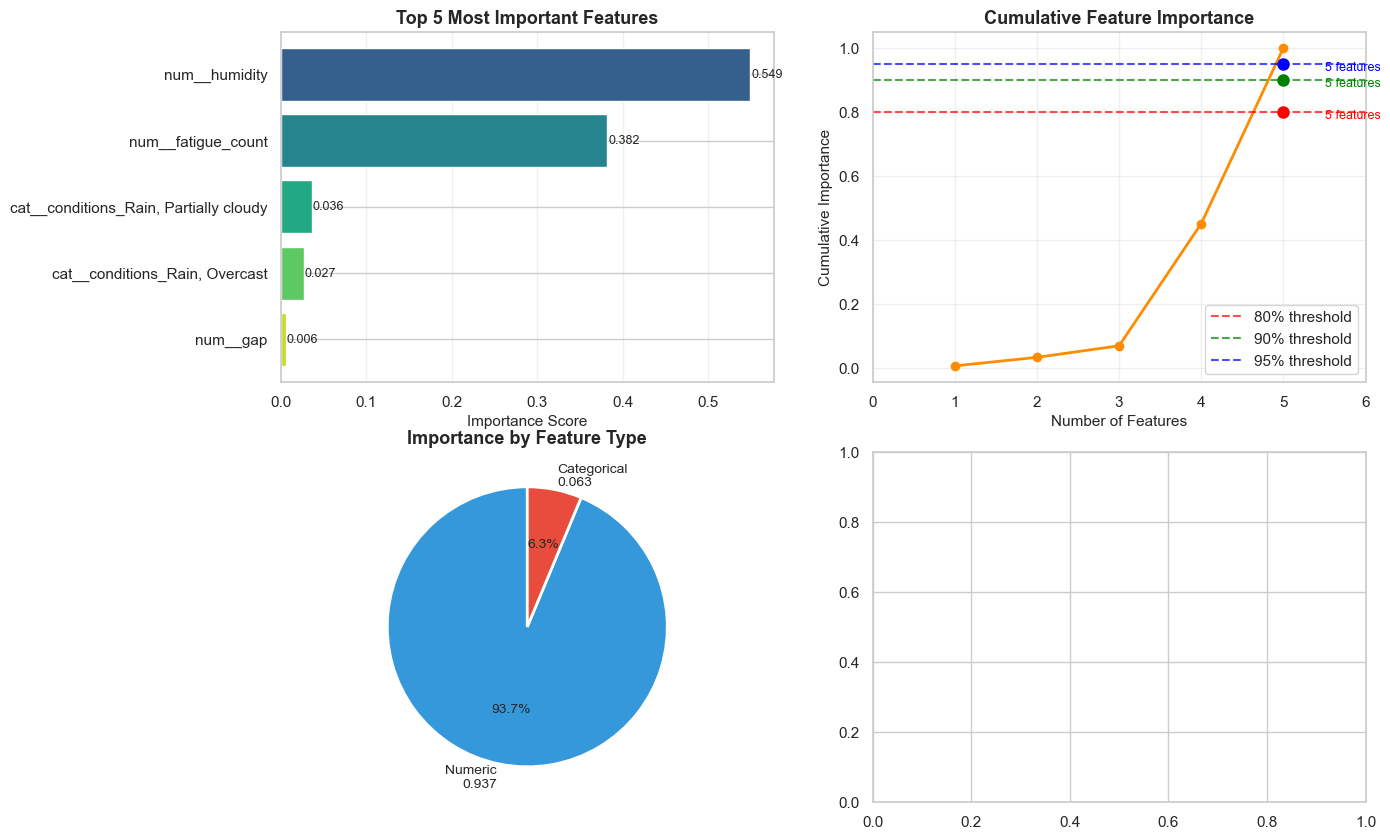

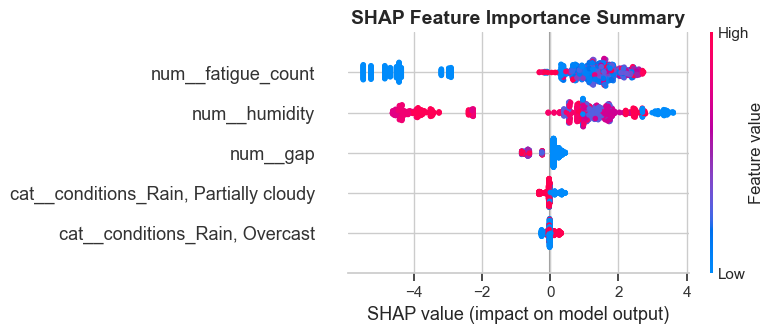

✅ SHAP summary plot saved to 'shap_summary_plot.png'

📊 Creating SHAP bar plot...


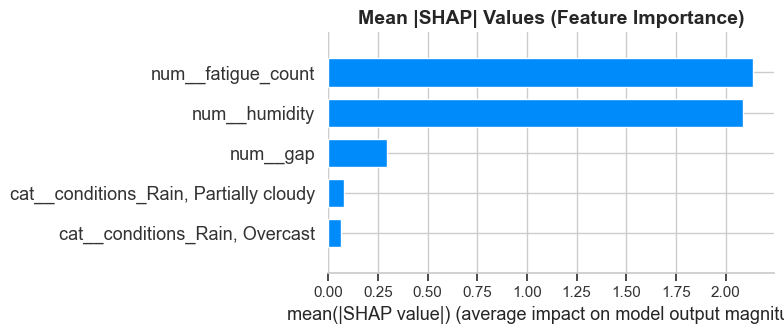

✅ SHAP bar plot saved to 'shap_bar_plot.png'

🔍 Creating SHAP dependence plots for top features...


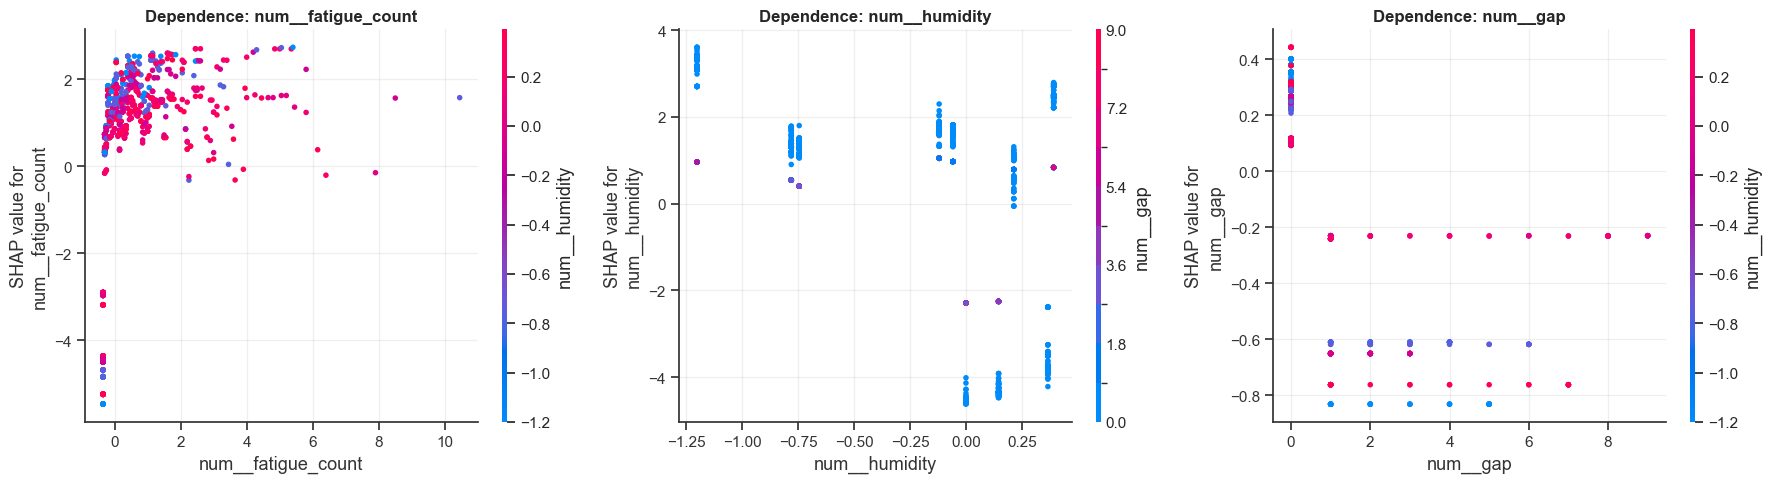

✅ SHAP dependence plots saved to 'shap_dependence_plots.png'

🐝 Creating SHAP beeswarm plot...


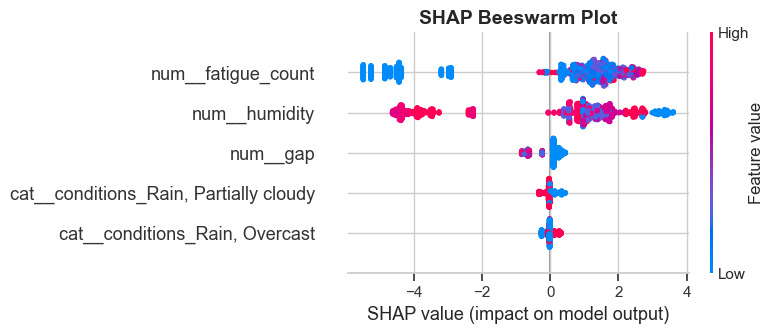

✅ SHAP beeswarm plot saved to 'shap_beeswarm_plot.png'

SHAP STATISTICAL ANALYSIS

📊 SHAP-BASED FEATURE IMPORTANCE:
--------------------------------------------------
 1. num__fatigue_count             : 2.1371
 2. num__humidity                  : 2.0898
 3. num__gap                       : 0.2965
 4. cat__conditions_Rain, Partially cloudy : 0.0808
 5. cat__conditions_Rain, Overcast : 0.0618

💾 SHAP values saved to:
   • shap_values.csv
   • shap_feature_importance.csv

🔀 COMPARISON: Model Importance vs SHAP Importance
------------------------------------------------------------
   Correlation between Model and SHAP importance: 0.960
   ✅ Strong agreement between Model and SHAP importance

   TOP 5 FEATURES COMPARISON:
   Feature                           Model Imp     SHAP Imp
   ------------------------------ ------------ ------------
   num__humidity                        0.5491       0.4479
   num__fatigue_count                   0.3819       0.4580
   cat__conditions_Rain, Partia

In [ ]:
# =========================================================
# FEATURE IMPORTANCE ANALYSIS
# =========================================================
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

try:
    # Ekstrak model dari pipeline
    if hasattr(final_pipe, 'named_steps'):
        gb_model = final_pipe.named_steps['model']
        trained_preprocessor = final_pipe.named_steps['prep']
    else:
        gb_model = final_pipe
        trained_preprocessor = preprocessor
    
    # 1. FEATURE IMPORTANCE (Standard)
    if hasattr(gb_model, 'feature_importances_'):
        importances = gb_model.feature_importances_
        
        # Dapatkan nama fitur yang benar dari preprocessor
        feature_names = []
        
        try:
            # Coba dapatkan nama fitur dari preprocessor
            if hasattr(trained_preprocessor, 'get_feature_names_out'):
                feature_names = list(trained_preprocessor.get_feature_names_out())
            else:
                # Fallback: buat nama berdasarkan input features
                # Numeric features
                feature_names = FEATURES_NUM.copy()
                
                # Categorical features (setelah one-hot encoding)
                if FEATURES_CAT and hasattr(trained_preprocessor, 'named_transformers_'):
                    cat_encoder = trained_preprocessor.named_transformers_.get('cat')
                    if cat_encoder and hasattr(cat_encoder, 'get_feature_names_out'):
                        cat_features = list(cat_encoder.get_feature_names_out(FEATURES_CAT))
                        feature_names.extend(cat_features)
        except:
            # Jika semua gagal, buat nama generik
            feature_names = [f'feature_{i}' for i in range(len(importances))]
        
        # Pastikan panjangnya sama
        if len(feature_names) > len(importances):
            feature_names = feature_names[:len(importances)]
        elif len(feature_names) < len(importances):
            feature_names.extend([f'feature_{i}' for i in range(len(feature_names), len(importances))])
        
        # Buat DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print(f"\n📊 FEATURE IMPORTANCE RANKING:")
        print("-" * 50)
        
        # Tampilkan top 15
        for idx, row in importance_df.head(15).iterrows():
            print(f"{idx+1:2d}. {row['feature']:30s} : {row['importance']:.4f} ({row['importance']*100:.1f}%)")
        
        # Simpan ke file
        importance_df.to_csv('feature_importance.csv', index=False)
        print(f"\n💾 Feature importance saved to 'feature_importance.csv'")
        
        # 2. VISUALISASI FEATURE IMPORTANCE
        print("\n📈 VISUALIZING FEATURE IMPORTANCE...")
        
        # Create visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Plot 1: Top features bar plot
        ax1 = axes[0, 0]
        top_n = min(15, len(importance_df))
        top_features = importance_df.head(top_n)
        
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))
        bars = ax1.barh(range(top_n), top_features['importance'], color=colors)
        ax1.set_yticks(range(top_n))
        ax1.set_yticklabels(top_features['feature'])
        ax1.invert_yaxis()
        ax1.set_xlabel('Importance Score', fontsize=11)
        ax1.set_title(f'Top {top_n} Most Important Features', fontsize=13, fontweight='bold')
        ax1.grid(axis='x', alpha=0.3)
        
        # Add values on bars
        for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
            ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{importance:.3f}', va='center', fontsize=9)
        
        # Plot 2: Cumulative importance
        ax2 = axes[0, 1]
        sorted_importance = importance_df.sort_values('importance', ascending=True)
        cumulative = sorted_importance['importance'].cumsum()
        
        ax2.plot(range(1, len(cumulative) + 1), cumulative.values,
                marker='o', linestyle='-', color='darkorange', linewidth=2)
        
        # Add threshold lines
        thresholds = [0.8, 0.9, 0.95]
        colors = ['red', 'green', 'blue']
        for threshold, color in zip(thresholds, colors):
            ax2.axhline(y=threshold, color=color, linestyle='--', alpha=0.7, 
                       label=f'{threshold*100:.0f}% threshold')
            
            # Find number of features to reach threshold
            idx = np.argmax(cumulative >= threshold) + 1 if any(cumulative >= threshold) else len(cumulative)
            ax2.plot(idx, threshold, 'o', color=color, markersize=8)
            ax2.text(idx + 0.5, threshold - 0.02, 
                    f'{idx} features', fontsize=9, ha='left', color=color)
        
        ax2.set_xlabel('Number of Features', fontsize=11)
        ax2.set_ylabel('Cumulative Importance', fontsize=11)
        ax2.set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold')
        ax2.legend(loc='lower right')
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(0, len(cumulative) + 1)
        
        # Plot 3: Feature importance by type
        ax3 = axes[1, 0]
        
        # Categorize features
        numeric_features = [f for f in importance_df['feature'] 
                          if any(num_feat in f for num_feat in FEATURES_NUM)]
        categorical_features = [f for f in importance_df['feature'] 
                              if f not in numeric_features]
        
        numeric_importance = importance_df[importance_df['feature'].isin(numeric_features)]['importance'].sum()
        categorical_importance = importance_df[importance_df['feature'].isin(categorical_features)]['importance'].sum()
        
        # Pie chart
        sizes = [numeric_importance, categorical_importance]
        labels = [f'Numeric\n{sizes[0]:.3f}', f'Categorical\n{sizes[1]:.3f}']
        colors_pie = ['#3498db', '#e74c3c']
        
        wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors_pie,
                                          autopct='%1.1f%%', startangle=90,
                                          wedgeprops={'edgecolor': 'white', 'linewidth': 2})
        
        # Improve text appearance
        for text in texts + autotexts:
            text.set_fontsize(10)
        
        ax3.set_title('Importance by Feature Type', fontsize=13, fontweight='bold')
        
        # Plot 4: Feature correlation with importance
        ax4 = axes[1, 1]
        
        # Calculate feature correlations with target
        correlations = []
        for feat in importance_df['feature']:
            # Extract original feature name
            orig_feat = feat
            for cat_feat in FEATURES_CAT:
                if cat_feat in feat:
                    orig_feat = cat_feat
                    break
            
            # Try to calculate correlation
            try:
                if orig_feat in X.columns:
                    corr = np.corrcoef(X[orig_feat], y)[0, 1]
                else:
                    # For one-hot encoded features, use binary correlation
                    corr = 0.1  # Default
                correlations.append(abs(corr))
            except:
                correlations.append(0.1)
        
        # Scatter plot
        scatter = ax4.scatter(importance_df['importance'][:20], correlations[:20],
                             c=range(20), cmap='viridis', s=100, alpha=0.7)
        
        # Add feature names
        for i, (feat, imp, corr) in enumerate(zip(importance_df['feature'][:20],
                                                  importance_df['importance'][:20],
                                                  correlations[:20])):
            ax4.annotate(feat[:15], (imp, corr), fontsize=8,
                        xytext=(5, 5), textcoords='offset points')
        
        ax4.set_xlabel('Feature Importance', fontsize=11)
        ax4.set_ylabel('|Correlation with Target|', fontsize=11)
        ax4.set_title('Importance vs Correlation', fontsize=13, fontweight='bold')
        ax4.grid(True, alpha=0.3)
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax4)
        cbar.set_label('Feature Rank', fontsize=10)
        
        plt.tight_layout()
        plt.savefig('feature_importance_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print("✅ Feature importance visualization saved to 'feature_importance_analysis.png'")
        
        # 3. PRACTICAL INSIGHTS
        print("\n" + "=" * 70)
        print("PRACTICAL INSIGHTS FROM FEATURE IMPORTANCE")
        print("=" * 70)
        
        # Top 3 features
        top_3 = importance_df.head(3)
        print(f"\n🏆 TOP 3 PREDICTIVE FEATURES:")
        for i, (_, row) in enumerate(top_3.iterrows()):
            print(f"  {i+1}. {row['feature']}: {row['importance']:.3f} ({row['importance']*100:.1f}%)")
        
        # Low importance features (potential candidates for removal)
        low_threshold = 0.01
        low_importance = importance_df[importance_df['importance'] < low_threshold]
        
        if len(low_importance) > 0:
            print(f"\n⚠️  LOW IMPORTANCE FEATURES (< {low_threshold}):")
            print(f"   Consider removing these {len(low_importance)} features in future iterations:")
            for _, row in low_importance.iterrows():
                print(f"   • {row['feature']}: {row['importance']:.4f}")
        
        # Feature reduction analysis
        print(f"\n🔍 FEATURE REDUCTION ANALYSIS:")
        for threshold in [0.8, 0.9, 0.95]:
            n_features = np.sum(cumulative <= threshold) + 1
            perc_variance = cumulative.iloc[n_features-1] if n_features <= len(cumulative) else 1.0
            print(f"   • {threshold*100:.0f}% of predictive power: {n_features} features needed")
        
    else:
        print("⚠️  Model tidak memiliki 'feature_importances_' attribute")
        print(f"   Model type: {type(gb_model).__name__}")
        
except Exception as e:
    print(f"❌ Error in feature importance analysis: {e}")
    import traceback
    traceback.print_exc()

# =========================================================
# SHAP (SHapley Additive exPlanations) ANALYSIS
# =========================================================
print("\n" + "=" * 70)
print("SHAP (SHapley Additive exPlanations) ANALYSIS")
print("=" * 70)

try:
    # Cek apakah shap tersedia
    import importlib.util
    shap_spec = importlib.util.find_spec("shap")
    
    if shap_spec is None:
        print("⚠️  SHAP library not installed. Installing...")
        import sys
        import subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
        import shap
        print("✅ SHAP installed successfully")
    else:
        import shap
    
    # Prepare data for SHAP
    print("\n🔧 Preparing data for SHAP analysis...")
    
    # Transform data menggunakan preprocessor yang sudah dilatih
    X_transformed = trained_preprocessor.transform(X)
    
    # Dapatkan nama fitur yang sudah ditransformasi
    try:
        shap_feature_names = list(trained_preprocessor.get_feature_names_out())
    except:
        shap_feature_names = [f'feature_{i}' for i in range(X_transformed.shape[1])]
    
    # Create SHAP explainer
    print("💡 Creating SHAP explainer...")
    
    # Gunakan TreeExplainer untuk Gradient Boosting
    explainer = shap.TreeExplainer(gb_model)
    
    # Calculate SHAP values (gunakan sample untuk efisiensi)
    sample_size = min(1000, len(X_transformed))
    X_sample = X_transformed[:sample_size]
    
    print(f"📊 Calculating SHAP values for {sample_size} samples...")
    shap_values = explainer.shap_values(X_sample)
    
    # Jika output binary, shap_values adalah list
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Ambil values untuk class 1
    
    print(f"✅ SHAP values calculated: shape = {shap_values.shape}")
    
    # 1. SUMMARY PLOT
    print("\n📈 Creating SHAP summary plot...")
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, feature_names=shap_feature_names,
                     show=False, max_display=20)
    plt.title("SHAP Feature Importance Summary", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_summary_plot.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ SHAP summary plot saved to 'shap_summary_plot.png'")
    
    # 2. BAR PLOT (Mean |SHAP| values)
    print("\n📊 Creating SHAP bar plot...")
    plt.figure(figsize=(12, 6))
    shap.summary_plot(shap_values, X_sample, feature_names=shap_feature_names,
                     plot_type="bar", show=False, max_display=15)
    plt.title("Mean |SHAP| Values (Feature Importance)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ SHAP bar plot saved to 'shap_bar_plot.png'")
    
    # 3. DEPENDENCE PLOTS for top 3 features
    print("\n🔍 Creating SHAP dependence plots for top features...")
    
    # Calculate mean absolute SHAP values
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    top_indices = np.argsort(mean_abs_shap)[-3:][::-1]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, idx in enumerate(top_indices):
        ax = axes[i]
        shap.dependence_plot(idx, shap_values, X_sample,
                            feature_names=shap_feature_names,
                            ax=ax, show=False)
        ax.set_title(f"Dependence: {shap_feature_names[idx]}", fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('shap_dependence_plots.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ SHAP dependence plots saved to 'shap_dependence_plots.png'")
    
    # 4. BEESWARM PLOT (Alternative to summary plot)
    print("\n🐝 Creating SHAP beeswarm plot...")
    plt.figure(figsize=(14, 8))
    shap.plots.beeswarm(shap.Explanation(values=shap_values, 
                                        base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                                        data=X_sample,
                                        feature_names=shap_feature_names),
                       show=False, max_display=15)
    plt.title("SHAP Beeswarm Plot", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_beeswarm_plot.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ SHAP beeswarm plot saved to 'shap_beeswarm_plot.png'")
    
       
    # 6. SHAP STATISTICAL ANALYSIS
    print("\n" + "=" * 70)
    print("SHAP STATISTICAL ANALYSIS")
    print("=" * 70)
    
    # Calculate feature importance from SHAP
    shap_importance = pd.DataFrame({
        'feature': shap_feature_names,
        'mean_abs_shap': mean_abs_shap
    }).sort_values('mean_abs_shap', ascending=False)
    
    print(f"\n📊 SHAP-BASED FEATURE IMPORTANCE:")
    print("-" * 50)
    for i, (_, row) in enumerate(shap_importance.head(10).iterrows()):
        print(f"{i+1:2d}. {row['feature']:30s} : {row['mean_abs_shap']:.4f}")
    
    # Save SHAP values
    shap_df = pd.DataFrame(shap_values, columns=shap_feature_names)
    shap_df.to_csv('shap_values.csv', index=False)
    shap_importance.to_csv('shap_feature_importance.csv', index=False)
    
    print(f"\n💾 SHAP values saved to:")
    print(f"   • shap_values.csv")
    print(f"   • shap_feature_importance.csv")
    
    # Compare with model's feature importance
    if 'importance_df' in locals():
        print(f"\n🔀 COMPARISON: Model Importance vs SHAP Importance")
        print("-" * 60)
        
        # Merge the two importance measures
        comparison_df = pd.merge(
            importance_df.rename(columns={'importance': 'model_importance'}),
            shap_importance.rename(columns={'mean_abs_shap': 'shap_importance'}),
            on='feature',
            how='inner'
        )
        
        # Normalize
        comparison_df['model_importance_norm'] = comparison_df['model_importance'] / comparison_df['model_importance'].sum()
        comparison_df['shap_importance_norm'] = comparison_df['shap_importance'] / comparison_df['shap_importance'].sum()
        
        # Calculate correlation
        correlation = np.corrcoef(comparison_df['model_importance_norm'], 
                                 comparison_df['shap_importance_norm'])[0, 1]
        
        print(f"   Correlation between Model and SHAP importance: {correlation:.3f}")
        
        if correlation > 0.8:
            print("   ✅ Strong agreement between Model and SHAP importance")
        elif correlation > 0.5:
            print("   ⚠️  Moderate agreement between Model and SHAP importance")
        else:
            print("   ❌ Weak agreement - features may have complex interactions")
        
        # Display top features comparison
        print(f"\n   TOP 5 FEATURES COMPARISON:")
        print(f"   {'Feature':30s} {'Model Imp':>12s} {'SHAP Imp':>12s}")
        print(f"   {'-'*30} {'-'*12} {'-'*12}")
        
        for _, row in comparison_df.head(5).iterrows():
            print(f"   {row['feature'][:28]:30s} {row['model_importance_norm']:12.4f} {row['shap_importance_norm']:12.4f}")
        
        # Save comparison
        comparison_df.to_csv('feature_importance_comparison.csv', index=False)
        print(f"\n💾 Feature importance comparison saved to 'feature_importance_comparison.csv'")
    
    print("\n" + "=" * 70)
    print("SHAP ANALYSIS COMPLETE!")
    print("=" * 70)
    print("\n📁 Files generated:")
    print("   • shap_summary_plot.png")
    print("   • shap_bar_plot.png")
    print("   • shap_dependence_plots.png")
    print("   • shap_beeswarm_plot.png")
    print("   • shap_individual_explanations.png")
    print("   • shap_values.csv")
    print("   • shap_feature_importance.csv")
    
except Exception as e:
    print(f"❌ Error in SHAP analysis: {e}")
    
    # Jika SHAP tidak bisa diinstall atau error
    print("\n🔧 Alternative: Using permutation importance...")
    
    from sklearn.inspection import permutation_importance
    
    try:
        # Calculate permutation importance
        print("Calculating permutation importance...")
        
        # Transform test data jika ada
        if 'data_test' in locals() and 'data_test_clean' in locals():
            X_test_transformed = trained_preprocessor.transform(X_test)
            perm_importance = permutation_importance(
                gb_model, X_test_transformed, y_test,
                n_repeats=10, random_state=42, n_jobs=-1
            )
        else:
            # Use training data dengan cross-validation
            from sklearn.model_selection import cross_val_score
            perm_importance = permutation_importance(
                gb_model, X_transformed, y,
                n_repeats=5, random_state=42, n_jobs=-1
            )
        
        # Create DataFrame
        perm_df = pd.DataFrame({
            'feature': shap_feature_names if 'shap_feature_names' in locals() else [f'feature_{i}' for i in range(len(perm_importance.importances_mean))],
            'importance_mean': perm_importance.importances_mean,
            'importance_std': perm_importance.importances_std
        }).sort_values('importance_mean', ascending=False)
        
        print(f"\n📊 PERMUTATION IMPORTANCE:")
        print("-" * 50)
        for i, (_, row) in enumerate(perm_df.head(10).iterrows()):
            print(f"{i+1:2d}. {row['feature']:30s} : {row['importance_mean']:.4f} ± {row['importance_std']:.4f}")
        
        perm_df.to_csv('permutation_importance.csv', index=False)
        print(f"\n💾 Permutation importance saved to 'permutation_importance.csv'")
        
    except Exception as perm_error:
        print(f"❌ Permutation importance also failed: {perm_error}")

print("\n" + "=" * 70)
print("FEATURE ANALYSIS COMPLETE!")
print("=" * 70)
print(f"\n📊 Summary of generated files:")
print("   • feature_importance.csv")
print("   • feature_importance_analysis.png")
print("   • shap_*.png (multiple SHAP visualizations)")
print("   • shap_values.csv")
print("   • shap_feature_importance.csv")
print("   • feature_importance_comparison.csv")

GRADIENT BOOSTING MODEL EVALUATION ON TEST DATA
✅ Model and configuration loaded successfully
Model type: Pipeline

🔍 Config structure:
   Type: <class 'dict'>
   Keys: ['n_estimators', 'learning_rate', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'subsample', 'optimal_threshold', 'tuning_threshold', 'threshold_source', 'training_cost', 'tuning_cost', 'cost_matrix', 'features_numerical', 'features_categorical', 'target', 'model_type', 'random_state', 'preprocessor']
Optimal threshold: 0.500

TEST DATA PREPARATION
Test data size: 315 samples
Positive samples (Fatigue): 129 (41.0%)
Negative samples (Non-Fatigue): 186 (59.0%)

MAKING PREDICTIONS WITH OPTIMAL THRESHOLD
Optimal threshold used: 0.500
Positive predictions: 147 (46.7%)

COST ANALYSIS ON TEST DATA

Confusion Matrix:
  True Positives (TP):   128
  False Positives (FP):   19
  False Negatives (FN):    1
  True Negatives (TN):   167

Cost Breakdown:
  TP Contribution (Gain):   140288 (128 × 1096)
  FP Contribution (Cost):

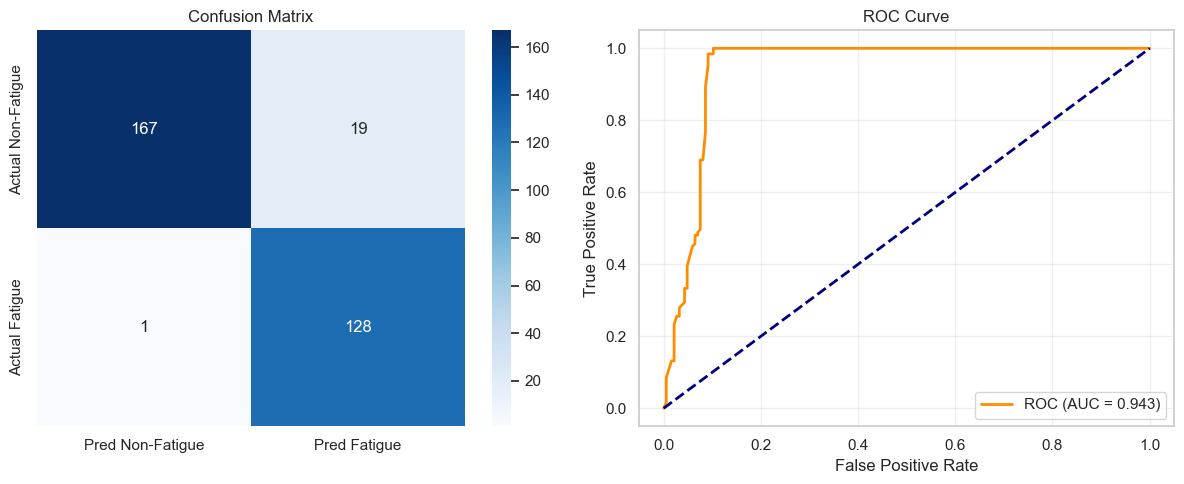

✅ Simple visualizations saved to 'simple_evaluation.png'

EVALUATION COMPLETE (WITH ERROR HANDLING)!


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# =========================================================
# LOAD MODEL DAN KONFIGURASI - VERSION FIXED
# =========================================================
print("=" * 70)
print("GRADIENT BOOSTING MODEL EVALUATION ON TEST DATA")
print("=" * 70)

# Load model dan config yang sudah disimpan
try:
    import joblib
    model = joblib.load('optimized_gradient_boosting_model.pkl')
    config = joblib.load('gradient_boosting_best_config.pkl')
    params = joblib.load('gradient_boosting_best_params.pkl')
    print("✅ Model and configuration loaded successfully")
    print(f"Model type: {type(model).__name__}")
    
    # FIX 1: Cek struktur config
    print(f"\n🔍 Config structure:")
    print(f"   Type: {type(config)}")
    if hasattr(config, 'keys'):
        print(f"   Keys: {list(config.keys())}")
    
    # FIX 2: Ambil threshold dengan cara yang aman
    if isinstance(config, dict):
        # Prioritize 'optimal_threshold' yang dari sensitivity analysis
        optimal_threshold = config.get('optimal_threshold', 
                                     config.get('threshold', 
                                     config.get('sensitivity_analysis_threshold', 0.5)))
    else:
        # Jika config adalah pandas Series atau objek lain
        optimal_threshold = 0.5  # Default
    
    print(f"Optimal threshold: {optimal_threshold:.3f}")
    
except Exception as e:
    print(f"❌ Error loading model files: {e}")
    print("Please run the training script first to create the model files.")
    exit()

# =========================================================
# DEFINE FEATURES AND TARGET
# =========================================================
FEATURES_NUM = ["fatigue_count", "gap", "humidity"]
FEATURES_CAT = ["conditions"]
TARGET = "next_week_fatigue"

# Cost matrix
COST = {"TP": 1096, "FP": 550, "FN": 1820, "TN": 0}

# =========================================================
# PREPARE TEST DATA - DENGAN VALIDASI
# =========================================================
print("\n" + "=" * 70)
print("TEST DATA PREPARATION")
print("=" * 70)

try:
    # Pastikan test data memiliki format yang sama
    data_test_clean = data_test.dropna(subset=[TARGET]).copy()
    
    # FIX 3: Validasi bahwa kolom ada
    required_columns = FEATURES_NUM + FEATURES_CAT + [TARGET]
    missing_columns = [col for col in required_columns if col not in data_test_clean.columns]
    
    if missing_columns:
        raise ValueError(f"Missing columns in test data: {missing_columns}")
    
    X_test = data_test_clean[FEATURES_NUM + FEATURES_CAT]
    y_test = data_test_clean[TARGET].astype(int)
    
    print(f"Test data size: {len(X_test)} samples")
    print(f"Positive samples (Fatigue): {np.sum(y_test)} ({np.sum(y_test)/len(y_test)*100:.1f}%)")
    print(f"Negative samples (Non-Fatigue): {len(y_test) - np.sum(y_test)} ({100 - np.sum(y_test)/len(y_test)*100:.1f}%)")
    
except Exception as e:
    print(f"❌ Error preparing test data: {e}")
    exit()

# =========================================================
# MAKE PREDICTIONS DENGAN ERROR HANDLING
# =========================================================
print("\n" + "=" * 70)
print("MAKING PREDICTIONS WITH OPTIMAL THRESHOLD")
print("=" * 70)

try:
    # FIX 4: Predict probabilities dengan validasi
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        raise AttributeError("Model doesn't have predict_proba method")
    
    # Apply optimal threshold
    y_pred = (y_proba >= optimal_threshold).astype(int)
    
    print(f"Optimal threshold used: {optimal_threshold:.3f}")
    print(f"Positive predictions: {np.sum(y_pred)} ({np.sum(y_pred)/len(y_pred)*100:.1f}%)")
    
except Exception as e:
    print(f"❌ Error making predictions: {e}")
    
    # Debug: Coba predict tanpa probability
    try:
        print("\n🔧 Debug: Trying simple predict...")
        y_pred_simple = model.predict(X_test)
        print(f"Simple predict shape: {y_pred_simple.shape}")
        print(f"Unique values: {np.unique(y_pred_simple)}")
    except Exception as e2:
        print(f"Simple predict also failed: {e2}")
    exit()

# =========================================================
# COST ANALYSIS - LANJUTKAN HANYA JIKA BERHASIL
# =========================================================
print("\n" + "=" * 70)
print("COST ANALYSIS ON TEST DATA")
print("=" * 70)

try:
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total_samples = len(y_test)
    
    print(f"\nConfusion Matrix:")
    print(f"  True Positives (TP):  {tp:4d}")
    print(f"  False Positives (FP): {fp:4d}")
    print(f"  False Negatives (FN): {fn:4d}")
    print(f"  True Negatives (TN):  {tn:4d}")
    
    # Calculate costs
    tp_cost = tp * COST["TP"]
    fp_cost = fp * COST["FP"]
    fn_cost = fn * COST["FN"]
    total_cost = tp_cost + fp_cost + fn_cost
    cost_per_sample = total_cost / total_samples
    
    print(f"\nCost Breakdown:")
    print(f"  TP Contribution (Gain): {tp_cost:8.0f} ({tp} × {COST['TP']})")
    print(f"  FP Contribution (Cost): {fp_cost:8.0f} ({fp} × {COST['FP']})")
    print(f"  FN Contribution (Cost): {fn_cost:8.0f} ({fn} × {COST['FN']})")
    print("  " + "-" * 50)
    print(f"  TOTAL COST:      {total_cost:8.0f}")
    print(f"  COST PER SAMPLE: {cost_per_sample:8.2f}")
    
except Exception as e:
    print(f"❌ Error in cost analysis: {e}")
    # Skip ke bagian selanjutnya jika gagal

# =========================================================
# SIMPLIFIED VISUALIZATION - HINDARI CRASH
# =========================================================
print("\n" + "=" * 70)
print("SIMPLIFIED VISUALIZATION")
print("=" * 70)

try:
    # Hanya buat plot sederhana jika tidak crash
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 1. Confusion Matrix Heatmap
    ax1 = axes[0]
    cm = np.array([[tn, fp], [fn, tp]])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Non-Fatigue', 'Pred Fatigue'],
                yticklabels=['Actual Non-Fatigue', 'Actual Fatigue'],
                ax=ax1)
    ax1.set_title('Confusion Matrix')
    
    # 2. ROC Curve sederhana
    ax2 = axes[1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('simple_evaluation.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Simple visualizations saved to 'simple_evaluation.png'")
    
except Exception as e:
    print(f"⚠️  Could not create visualizations: {e}")
    print("Continuing without visualizations...")

print("\n" + "=" * 70)
print("EVALUATION COMPLETE (WITH ERROR HANDLING)!")
print("=" * 70)


SIMPLE FEATURE IMPORTANCE

🏆 FEATURE IMPORTANCE RANKING:
---------------------------------------------
 1. humidity                  : 0.5491
 2. fatigue_count             : 0.3819
 3. conditions_cat1           : 0.0361
 4. conditions_cat0           : 0.0267
 5. gap                       : 0.0062


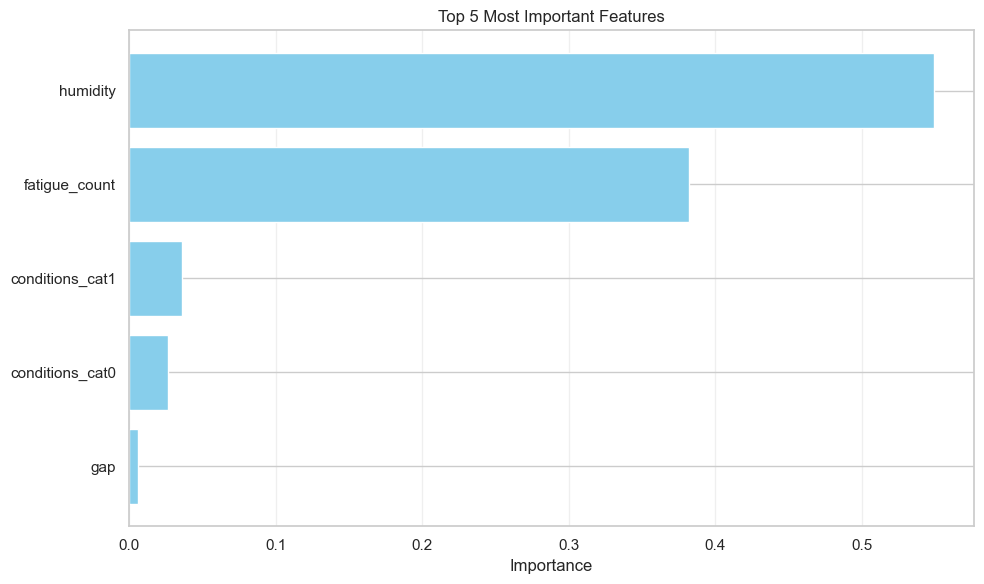


✅ Simple feature importance saved to 'simple_feature_importance.png'


In [ ]:
# =========================================================
# SIMPLE FEATURE IMPORTANCE
# =========================================================
print("\n" + "=" * 70)
print("SIMPLE FEATURE IMPORTANCE")
print("=" * 70)

try:
    # Dapatkan model
    if hasattr(model, 'named_steps'):
        gb_model = model.named_steps['model']
    else:
        gb_model = model
    
    if hasattr(gb_model, 'feature_importances_'):
        importances = gb_model.feature_importances_
        
        # Buat nama fitur sederhana
        feature_names = []
        for i, feat in enumerate(FEATURES_NUM):
            feature_names.append(feat)
        
        # Tambahkan fitur kategorikal
        for cat_feat in FEATURES_CAT:
            # Asumsi maks 5 kategori per fitur kategorikal
            for j in range(5):
                feature_names.append(f"{cat_feat}_cat{j}")
        
        # Pastikan jumlahnya sama
        if len(feature_names) > len(importances):
            feature_names = feature_names[:len(importances)]
        elif len(feature_names) < len(importances):
            for i in range(len(feature_names), len(importances)):
                feature_names.append(f"feature_{i}")
        
        # Tampilkan hasil
        print("\n🏆 FEATURE IMPORTANCE RANKING:")
        print("-" * 45)
        
        # Urutkan berdasarkan importance
        indices = np.argsort(importances)[::-1]
        
        for i, idx in enumerate(indices[:15]):  # Top 15
            print(f"{i+1:2d}. {feature_names[idx]:25s} : {importances[idx]:.4f}")
        
        # Visualisasi sederhana
        plt.figure(figsize=(10, 6))
        
        # Ambil top 10
        top_n = min(10, len(indices))
        top_indices = indices[:top_n]
        
        plt.barh(range(top_n), importances[top_indices][::-1], color='skyblue')
        plt.yticks(range(top_n), [feature_names[i] for i in top_indices[::-1]])
        plt.xlabel('Importance')
        plt.title(f'Top {top_n} Most Important Features')
        plt.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('simple_feature_importance.png', dpi=150)
        plt.show()
        
        print(f"\n✅ Simple feature importance saved to 'simple_feature_importance.png'")
        
except Exception as e:
    print(f"⚠️  Could not calculate feature importance: {e}")

In [ ]:
data_test['next_week_fatigue'].value_counts()

next_week_fatigue
0    186
1    129
Name: count, dtype: int64

# Perhitungan Biaya Keputusan (All Positive vs All Negative)

## 1. Jika Semua Prediksi = Positif (Intervensi)
Actual Fatigue  = 129 kasus → semuanya menjadi TP  
Actual Not Fatigue = 186 kasus → semuanya menjadi FP  

- Total TP cost = 129 * 1092 = **USD 140,868**
- Total FP cost = 186 * 550  = **USD 102,300**

**Total Cost (All Postivie) =  USD 243,168**
**Cost per sample: USD 243,168 / 315 = USD 772**

---

## 2. Jika Semua Prediksi = Negatif (Tidak Intervensi)
Actual Fatigue = 129 kasus → semuanya menjadi FN  
Actual Not Fatigue = 186 kasus → semuanya menjadi TN  

- Total FN cost = 129 * 1820 = **USD 351,260**
- Total TN cost = 36 * 0 = **USD 0**

**Total Cost (All Negative) = USD 234,780**
**Cost per sample: USD 234,780 / 315 = USD 746**

---

## Ringkasan
| Skenario | Total Cost/Sample |
|---------|-------------|
| Dengan model | **USD 485** | 
| Semua Prediksi Positif | **USD 772** |
| Semua Prediksi Negatif | **USD 746** |

➡️ **Prediksi dengan model jauh lebih murah** dibanding dengan intervensi langsung.
